In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

In [2]:
data = pd.read_csv("puhastatud.csv")
data = data.drop("Unnamed: 0", axis=1)
routes = data.route_short_name.unique()

In [3]:
# Sisendiks on kindla sõidu (tripi) kuupäevad; tagastab mitu seda sõitu kokku toimus vaadeldavas ajavahemikus
# Võib olla veidi ebatäpne, kuna on tehtud eeldusel, et trippide väljumispäevad on pärit hulgast {ETKNR, ETKNRLP, LP}
# Muidu, kuna igat päeva esines ajavahemikus 5 korda, siis üsna lollikindel
def get_trip_amount_by_dates(dates):
    total = 0
    s = set(pd.to_datetime(dates, format="%d.%m.%Y").dayofweek)
    if 0 in s or 1 in s or 2 in s or 3 in s or 4 in s:
        total += 5 * 5
    if 5 in s or 6 in s:
        total += 5 * 2
    return total

In [4]:
def make_graph(direction, too_early):
    heatmap_data = pd.DataFrame()

    selection = data[(data.route_direction_id == direction)][["trip_departure_time", "stop_name", "deviation", "a_date", "stop_sequence", "name"]]
    if too_early:
        selection = selection[selection.deviation < 0]
    else:
        selection = selection[selection.deviation > 0]

    df = selection.groupby(["trip_departure_time", "name"]).count().reset_index()
    df = df.loc[df.groupby('trip_departure_time')['stop_name'].idxmax()]
    df = df[["trip_departure_time", "name"]]

    for time in df.trip_departure_time:
        selection.loc[selection.trip_departure_time == time, "trip_departure_time"] = time[0:5] +" ("+ df[df.trip_departure_time == time].name.unique()[0][4:].zfill(3)+")"


    d = selection.groupby(["trip_departure_time", "stop_name", "stop_sequence"]).count().reset_index()
    sequence = selection[["stop_sequence", "stop_name"]].drop_duplicates().sort_values("stop_sequence")
    for time in selection.trip_departure_time.unique():
        total = get_trip_amount_by_dates(selection[selection.trip_departure_time == time].a_date.unique())
        d.loc[d.trip_departure_time == time, "deviation"] = d["deviation"] / total

    d.sort_values("stop_sequence")

    heatmap_data = pd.pivot_table(d, values="deviation", 
             index=['trip_departure_time'], 
             columns="stop_name")
    heatmap_data = heatmap_data.round(4)

    heatmap_data = heatmap_data[sequence.stop_name]
    
    ##################################################
    s0=14
    s1=12
    s2=7
    
    height = len(data[data.route_direction_id == direction].trip_id.unique()) / 6.36
    width = (data[data.route_direction_id == direction].total_stops.unique()[0] - 1) / 1.63

    plt.figure(figsize=(width ,height))
    cmap = cm.get_cmap('YlGnBu', 512)
    newcmp = ListedColormap(cmap(np.linspace(0.0, 0.75, 10)))

    sns.heatmap(heatmap_data,
                cmap=newcmp,
                linewidths=0.005,
                linecolor='grey',
                cbar=True,
                square=False,
                annot=False,
                xticklabels=True,
                vmin=0.0,
                vmax=1.0,
                cbar_kws=dict(ticks=[0.0,.1, .2, .3,.4,.5,.6,.7,.8,.9,1.0])

          )


    ax = plt.gca()
    ax.set_ylim(len(heatmap_data)+0.04, -0.08)
    if too_early:
        ax.set_title("Probability of early departures on route "+ direction,fontsize=s0)
    else:
        ax.set_title("Probability of late departures on route "+ direction,fontsize=s0)

    plt.rcParams['ytick.labelsize'] = s2
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=s1)
    plt.xticks(rotation=90, size=s1-3)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.label.set_visible(False)
    #plt.savefig("4a.png", dpi=300, transparent=True)

    plt.show()

x-axis has stop names
y-axis has trip departure time and driver ID with most deviations


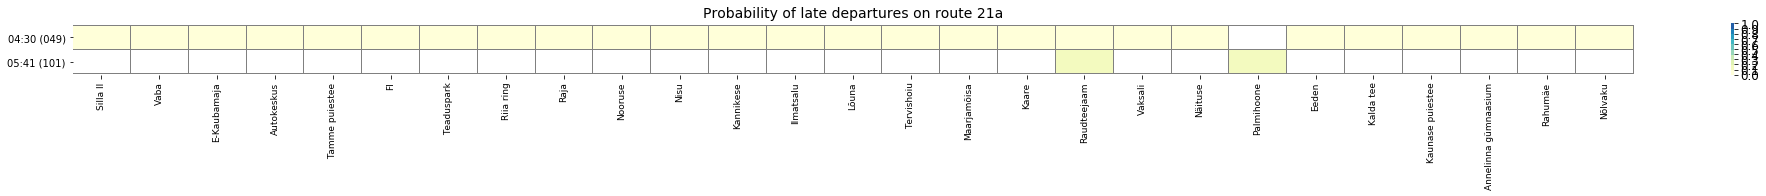

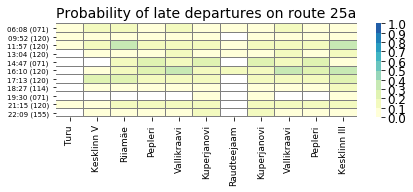

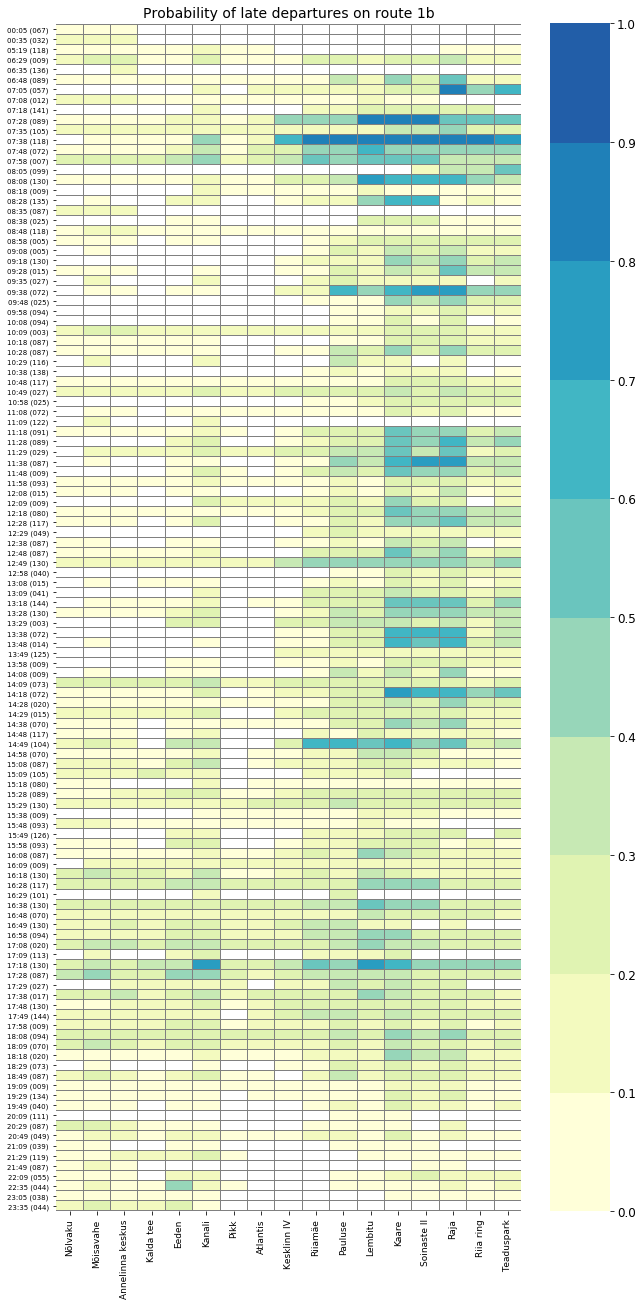

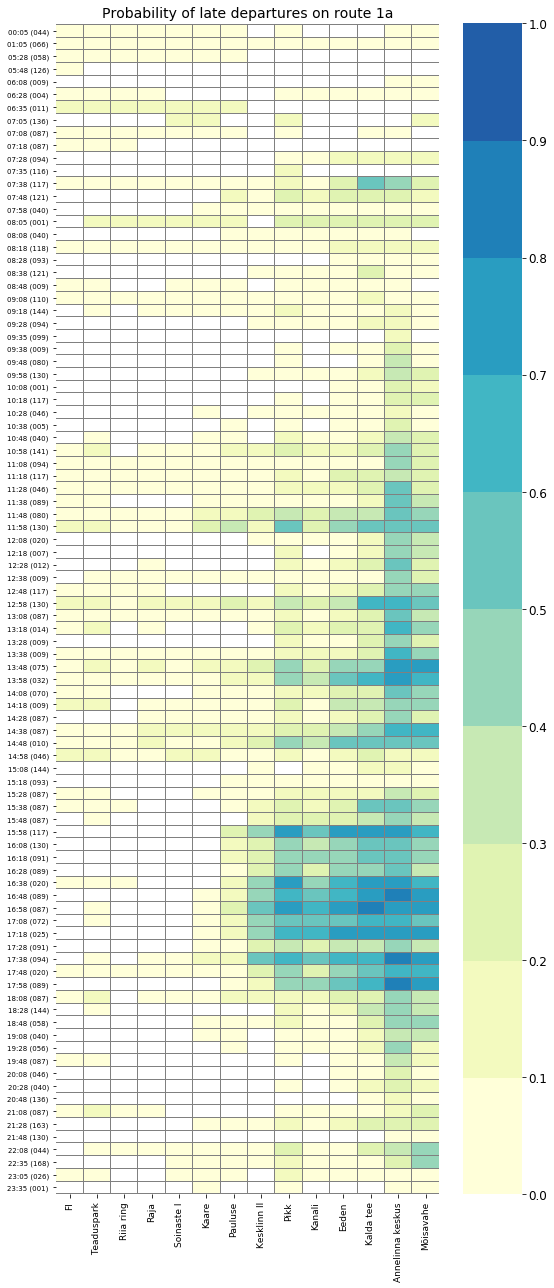

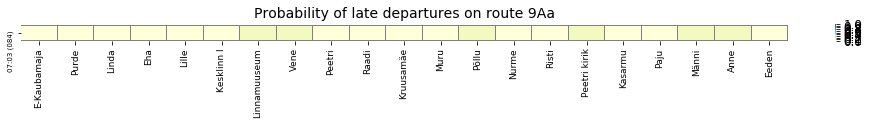

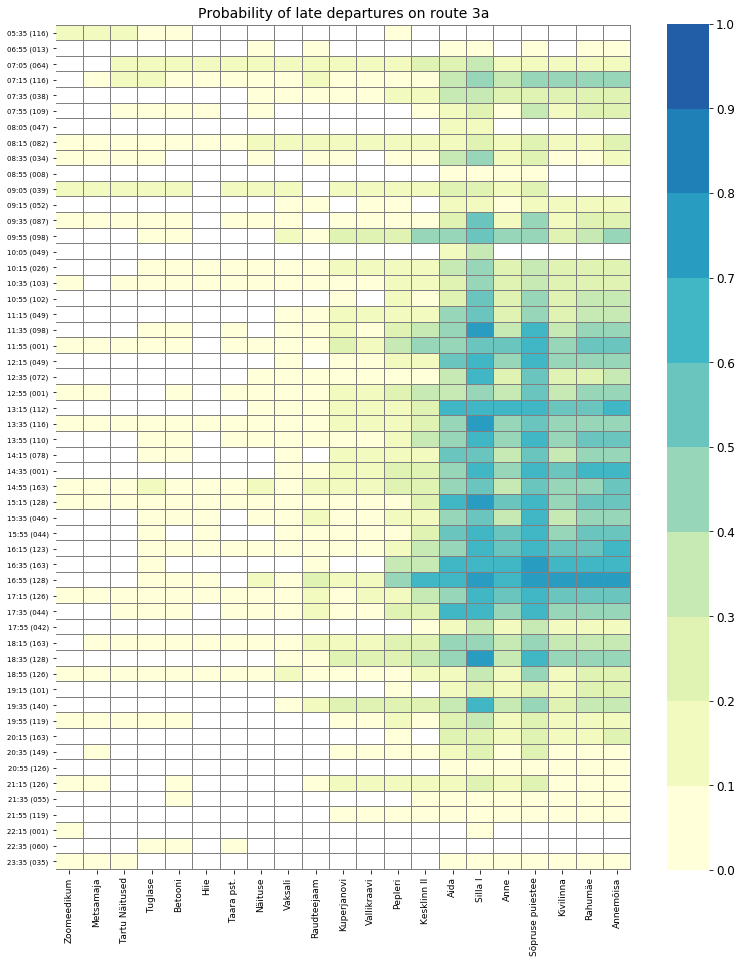

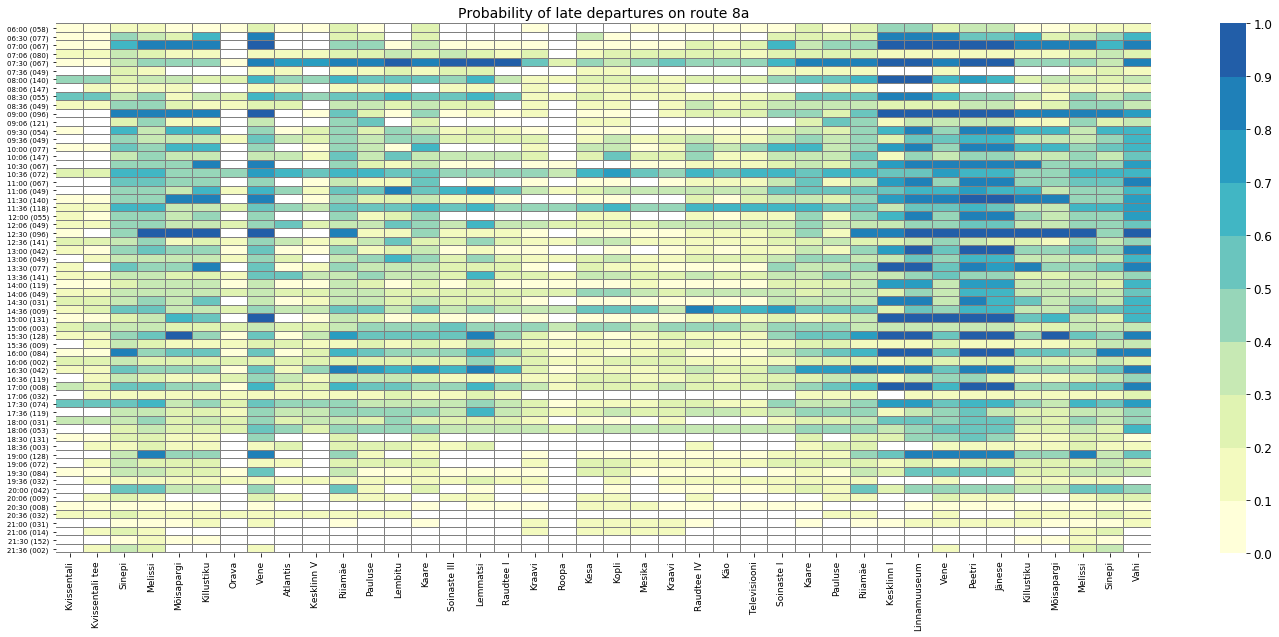

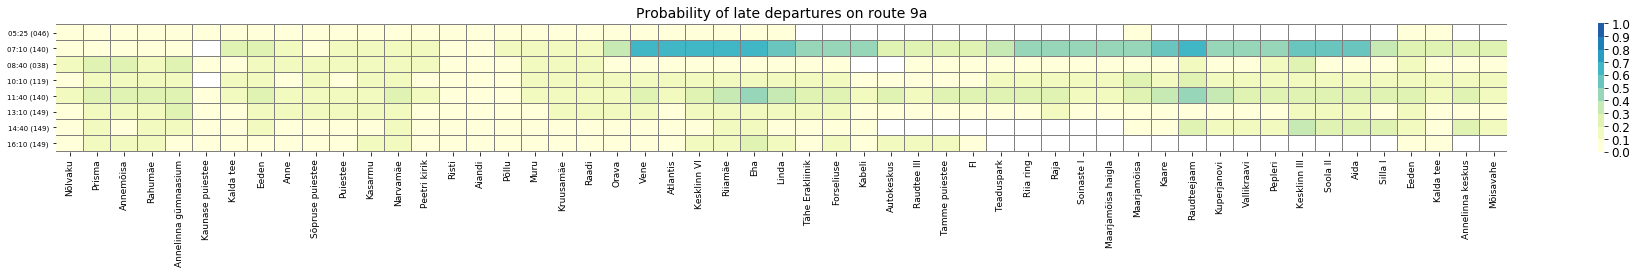

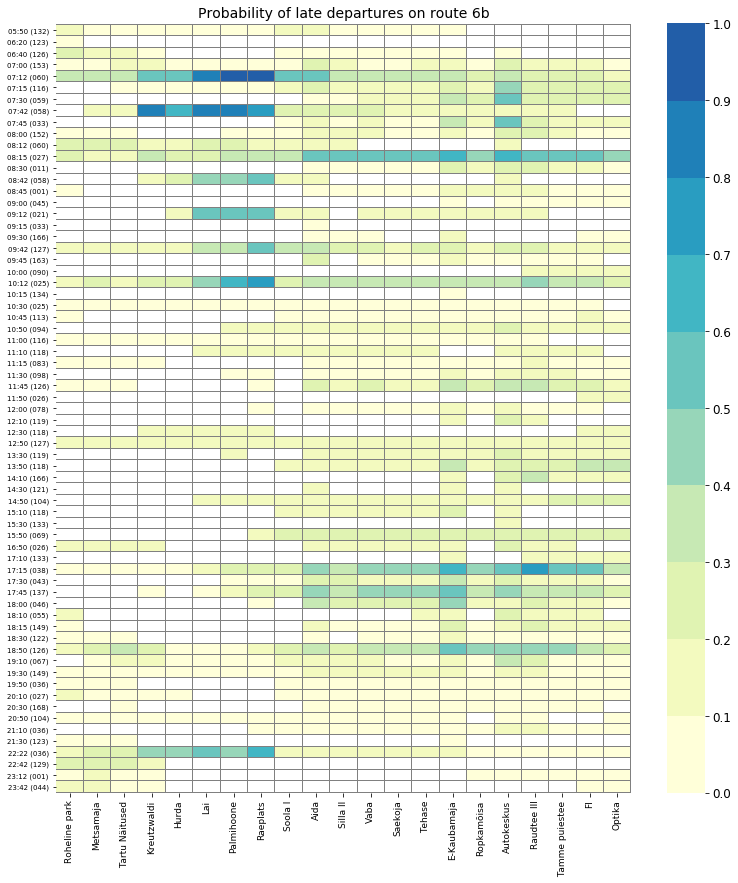

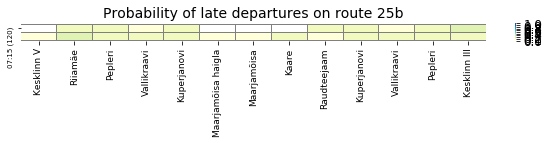

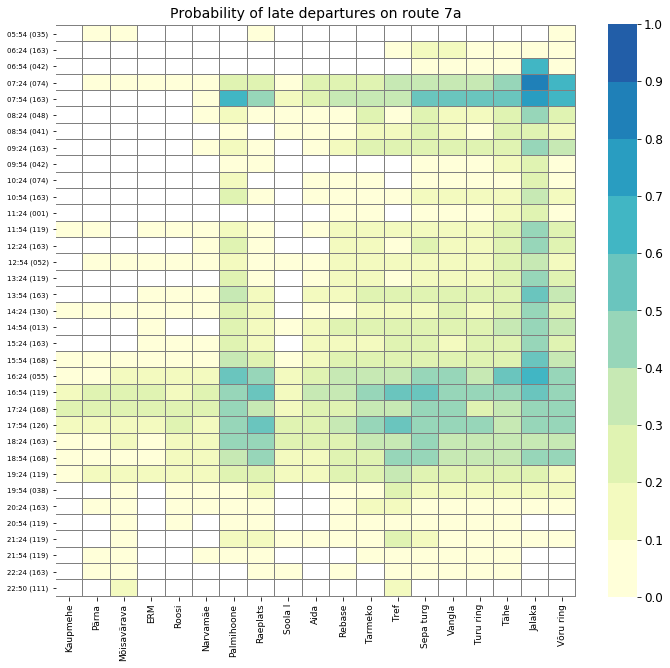

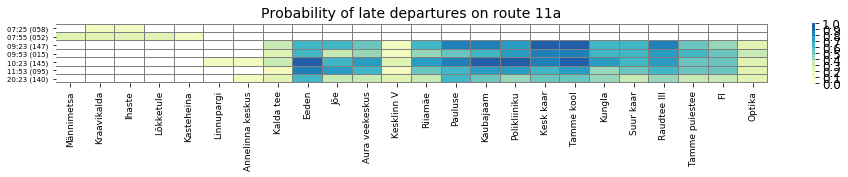

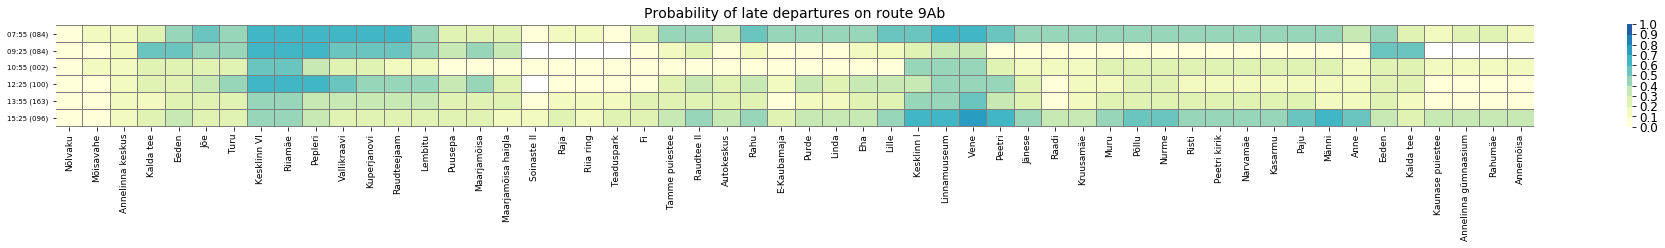

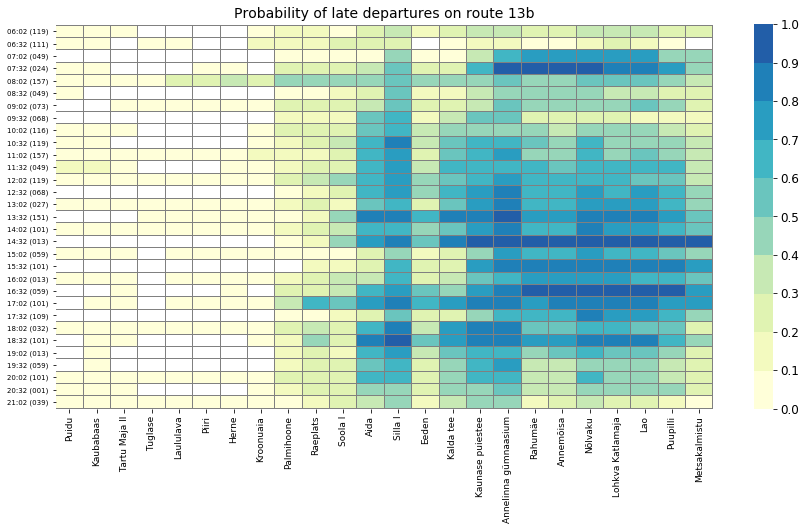

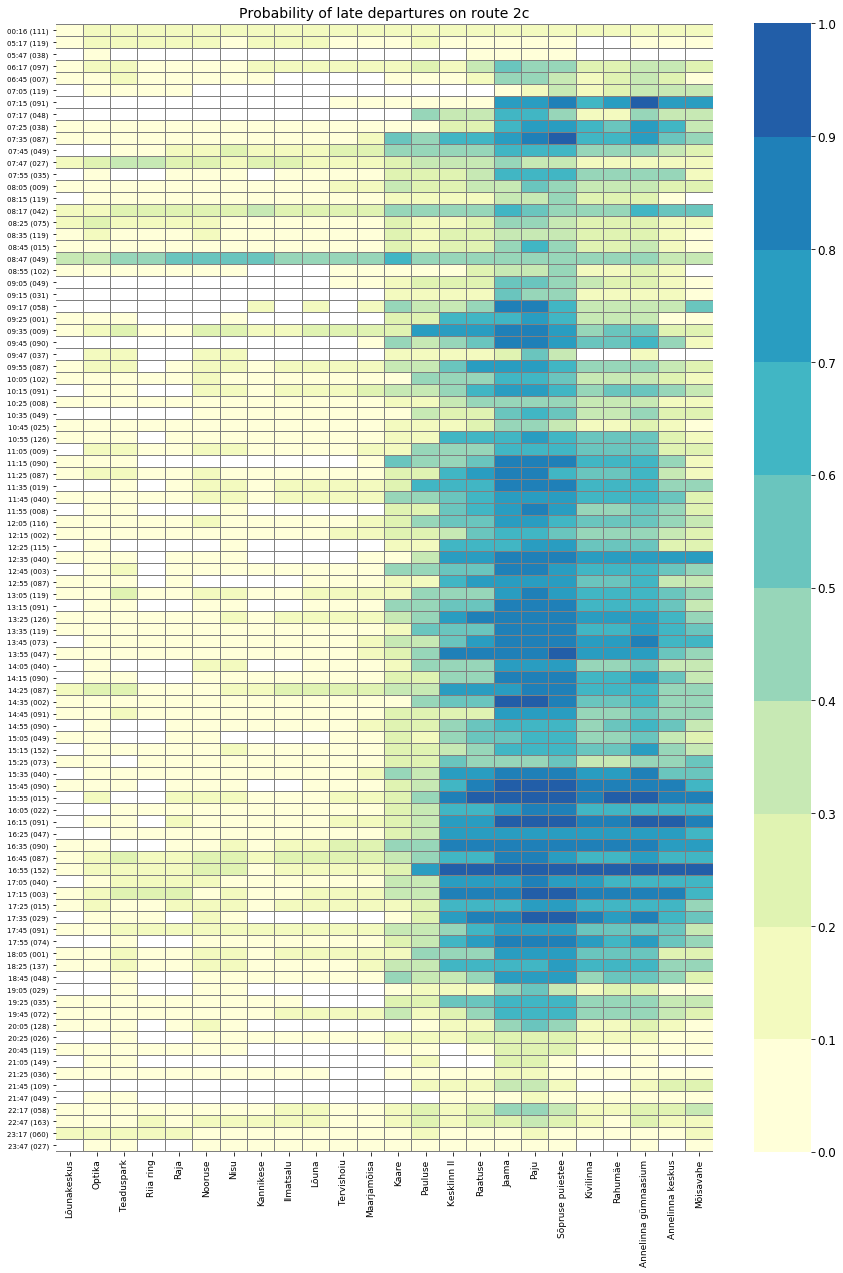

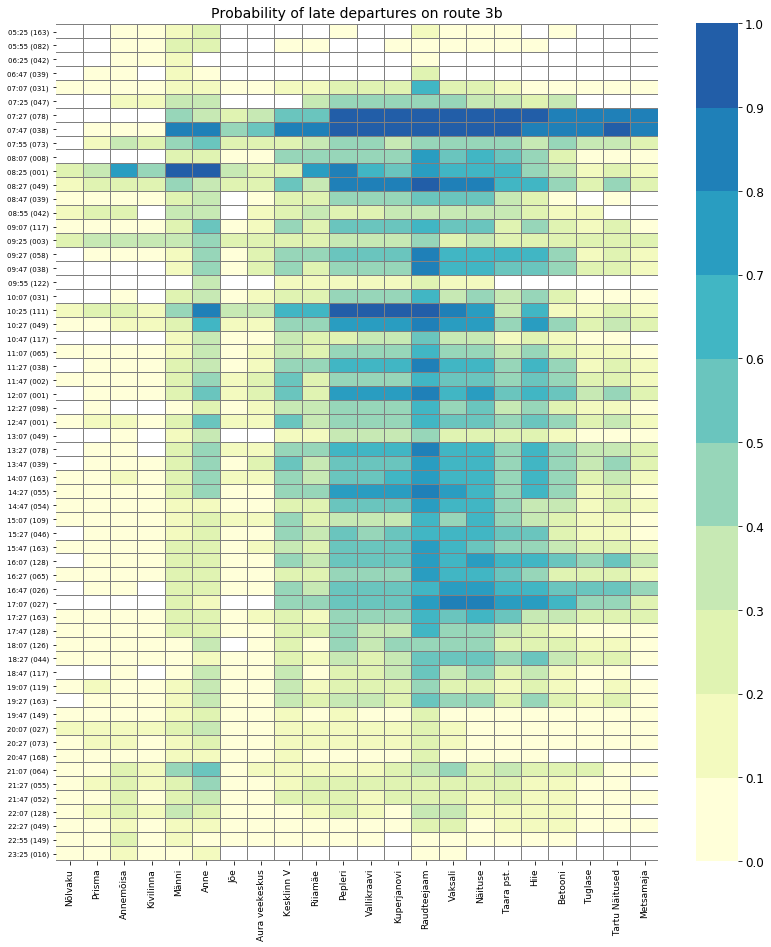

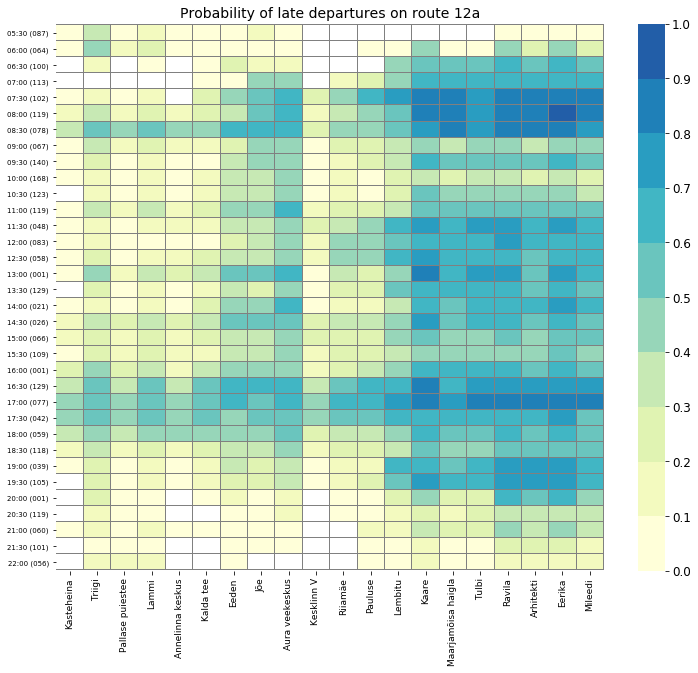

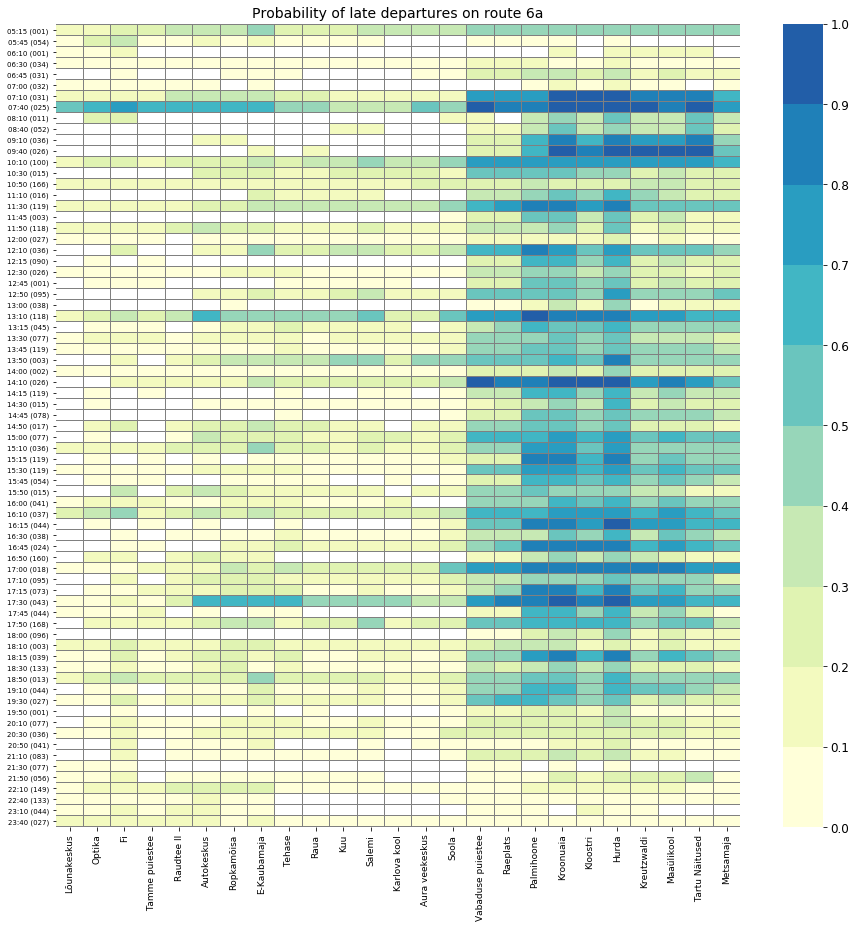

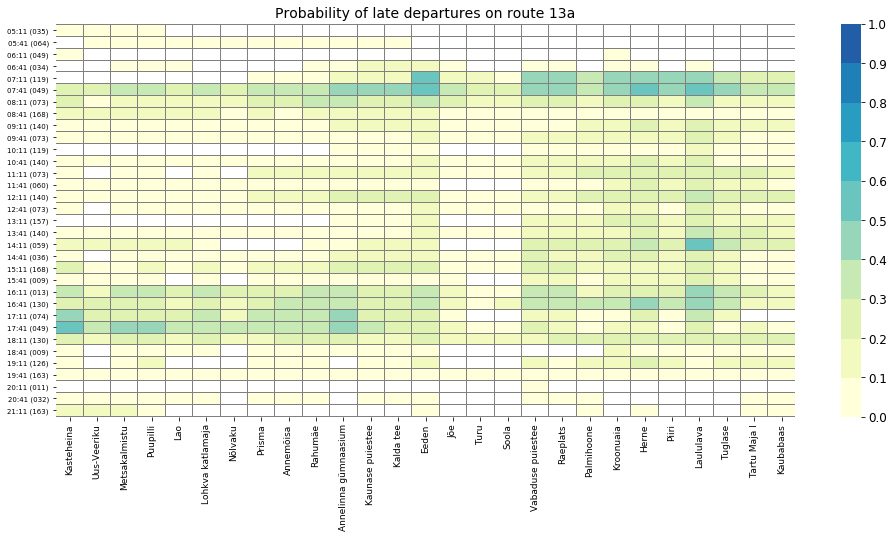

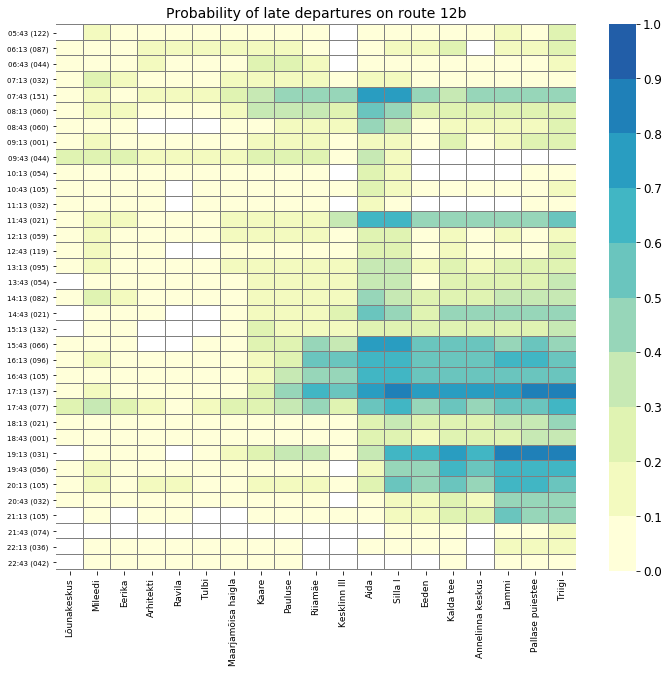

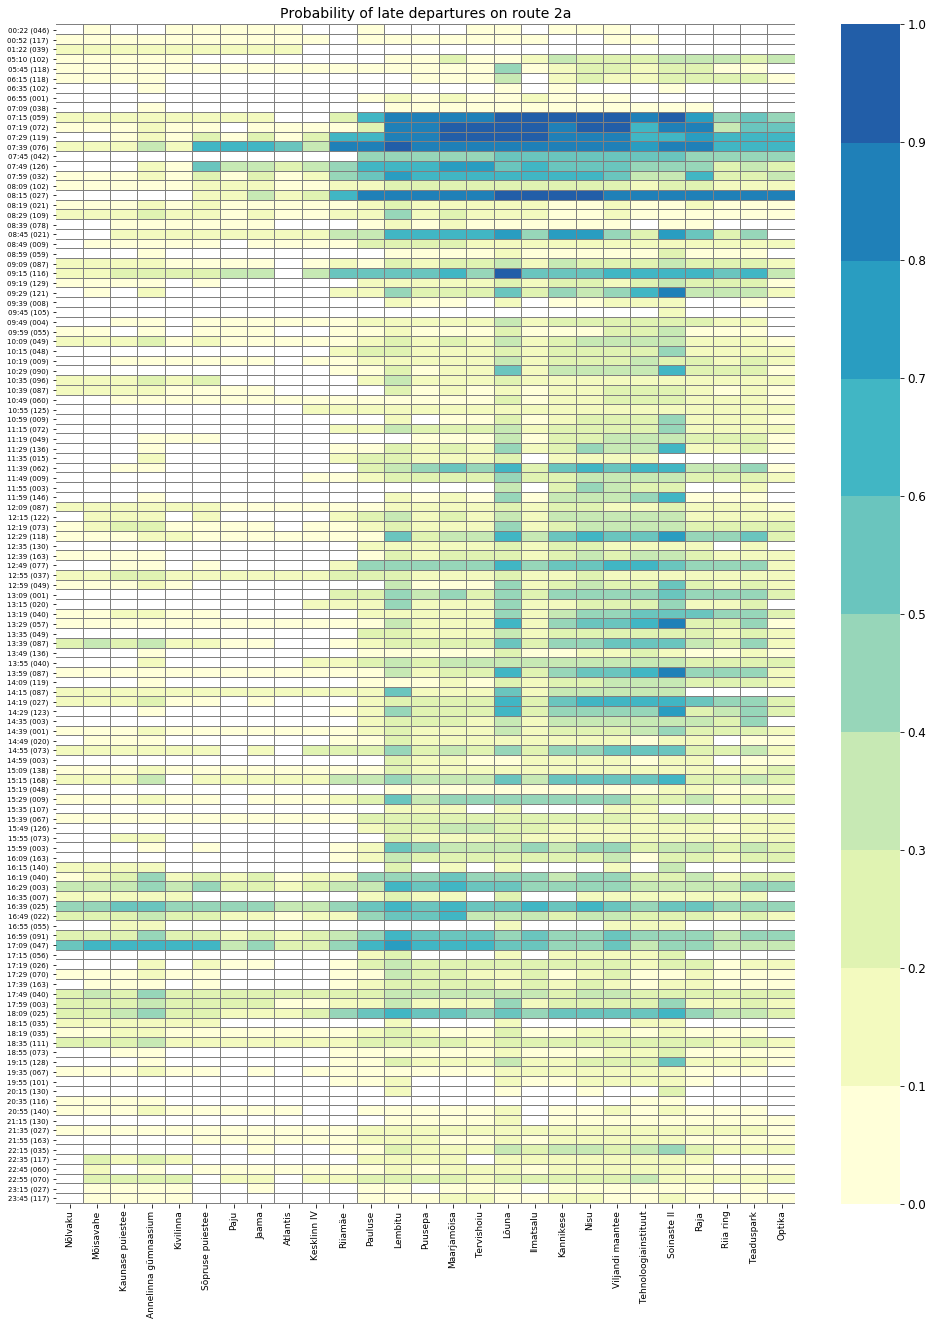

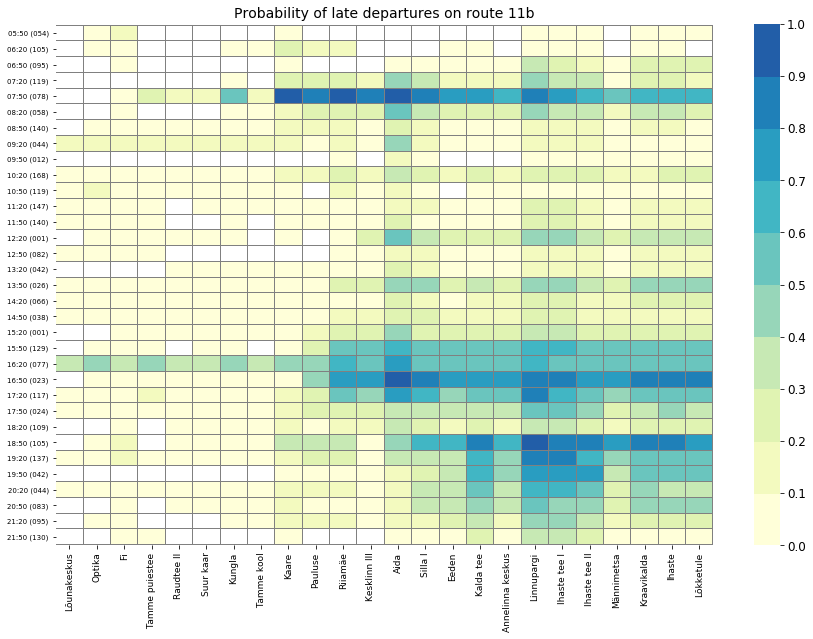

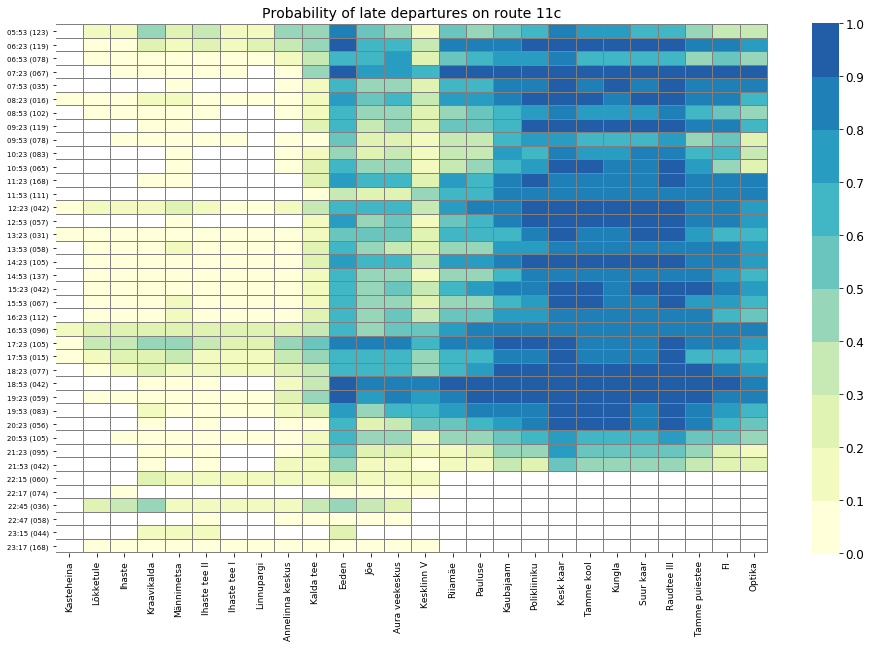

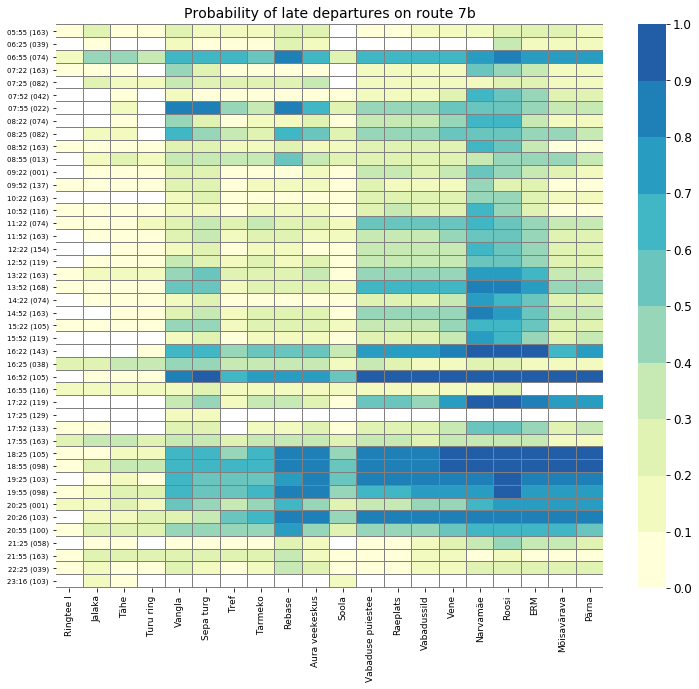

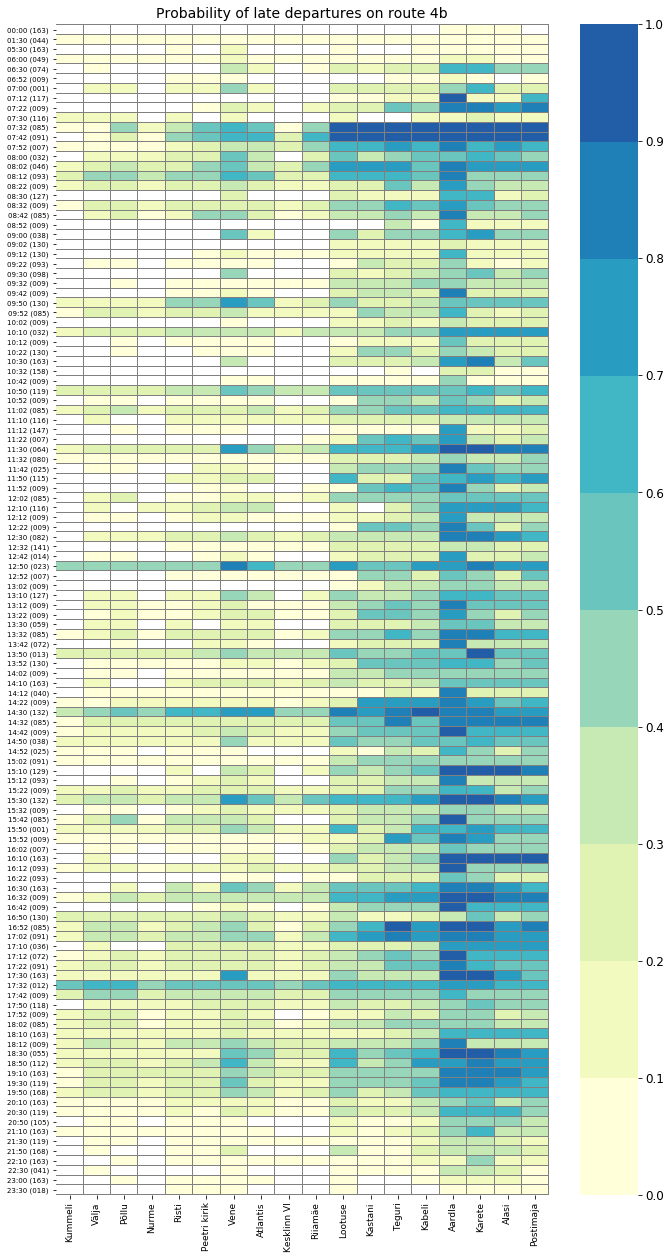

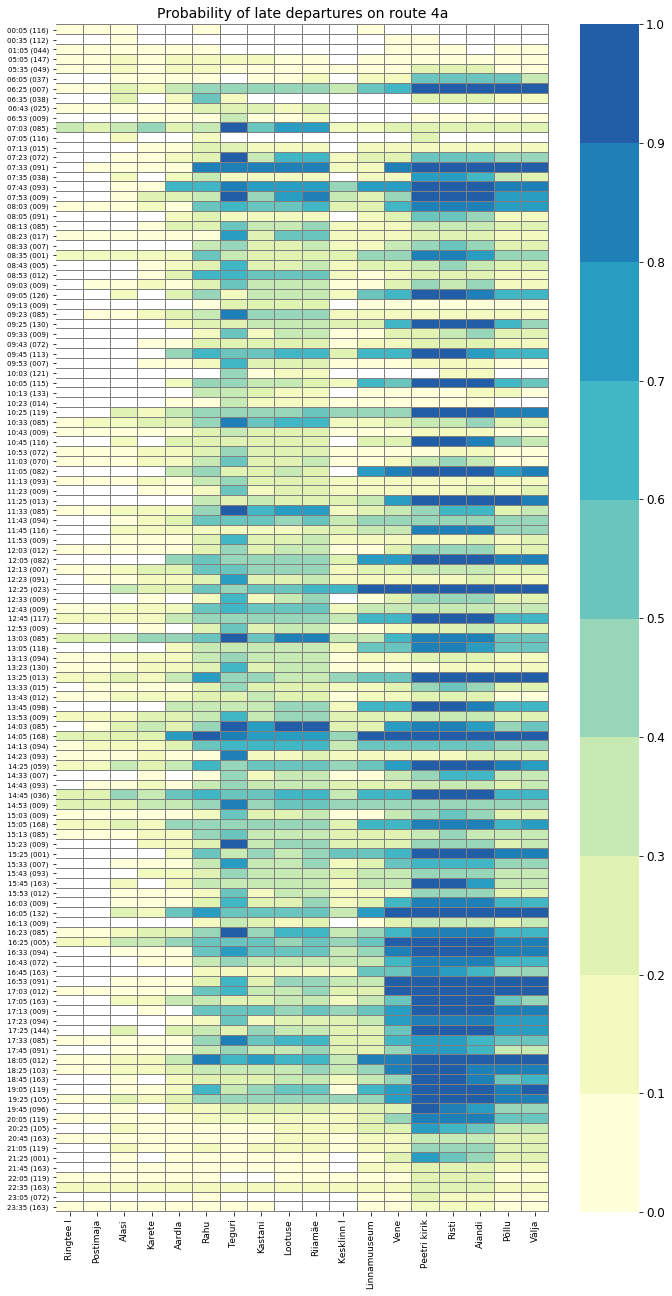

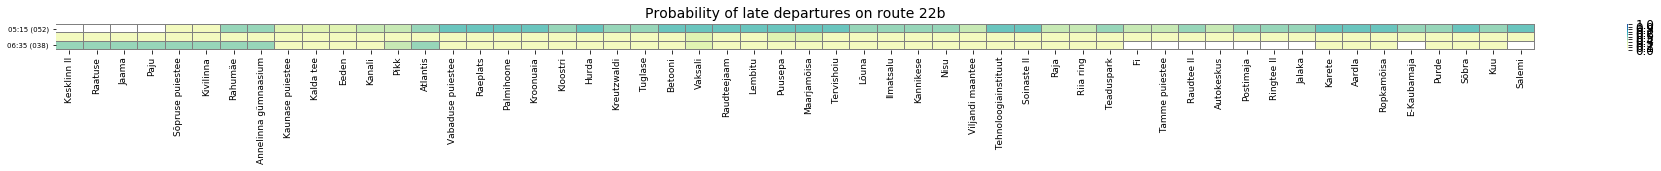

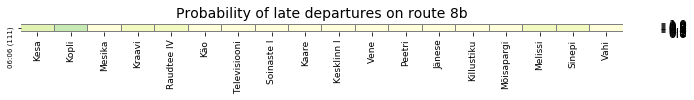

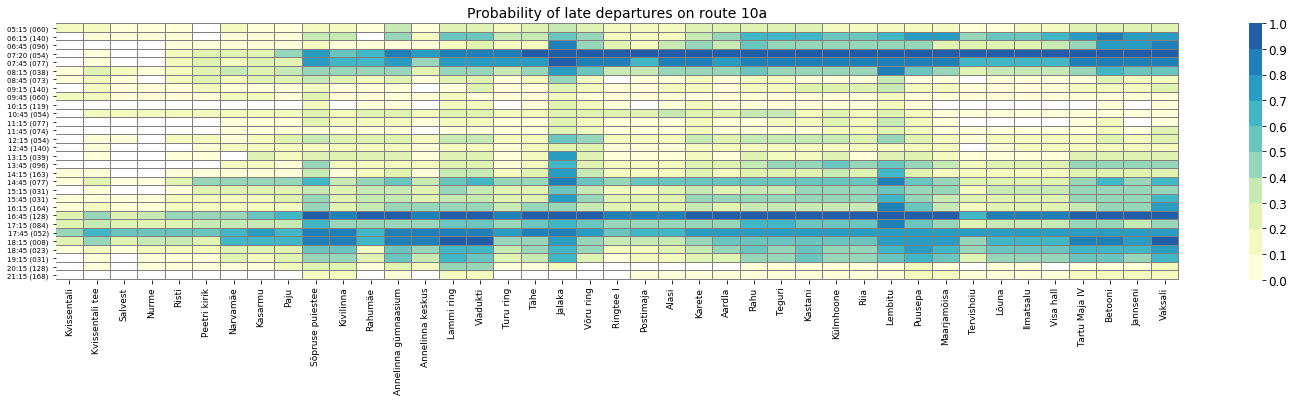

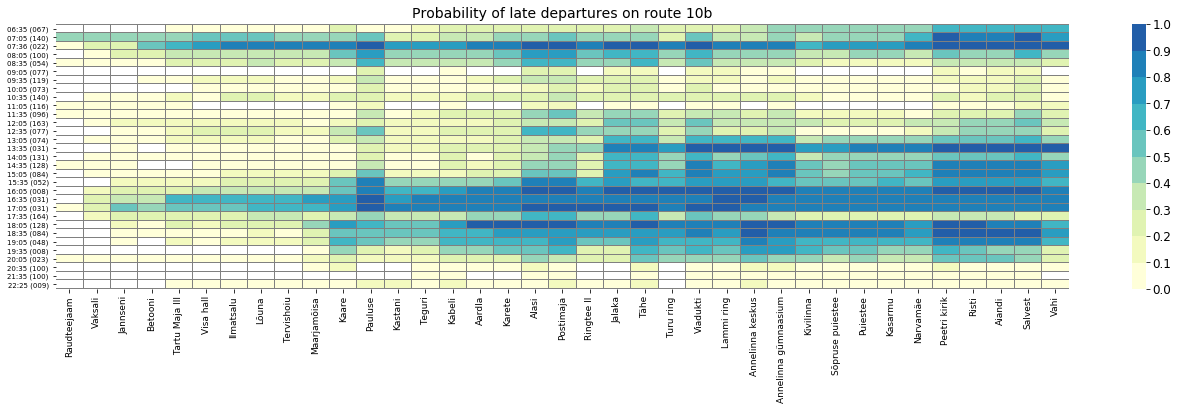

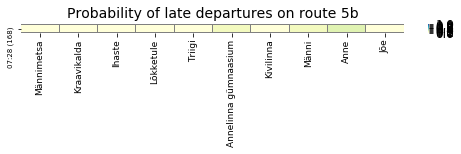

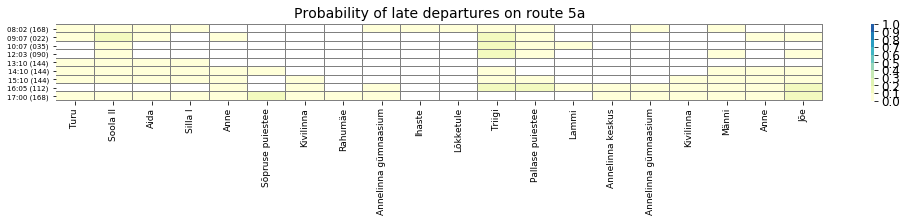

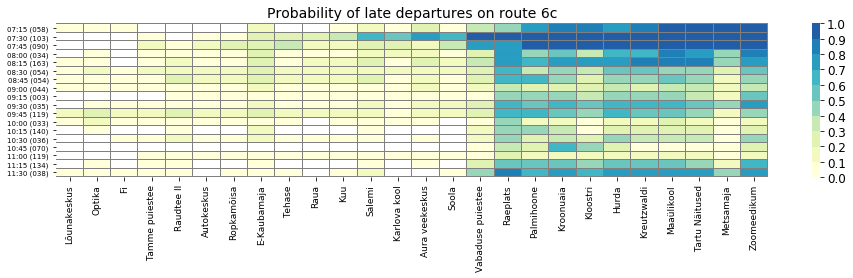

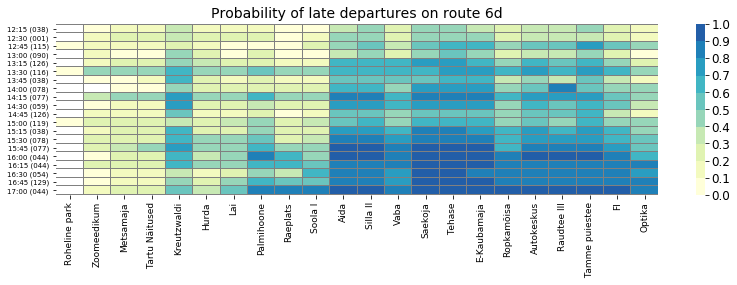

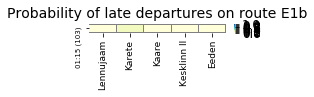

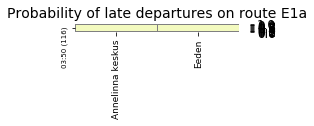

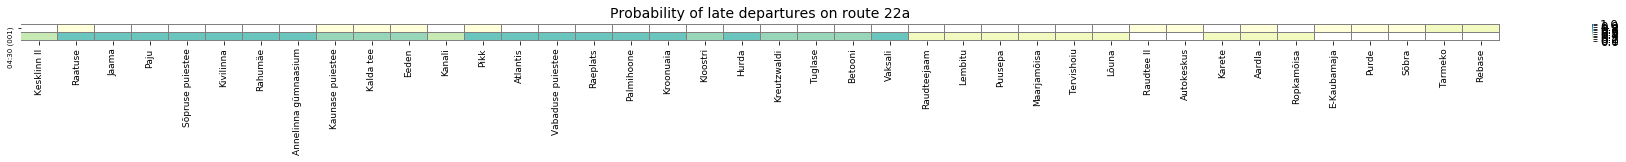

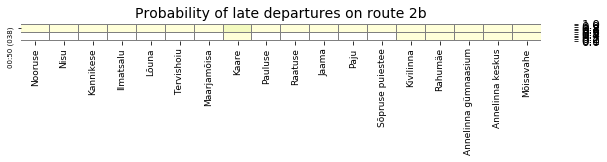

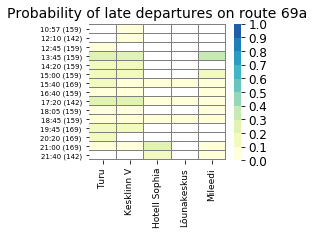

In [5]:
print("x-axis has stop names")
print("y-axis has trip departure time and driver ID with most deviations")

for direction in data.route_direction_id.unique():
    make_graph(direction, False)

x-axis has stop names
y-axis has trip departure time and driver ID with most deviations


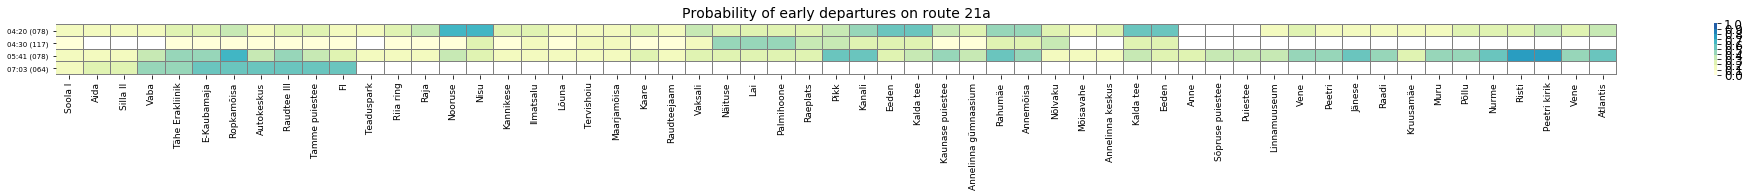

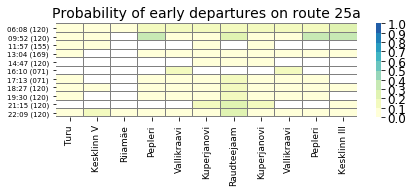

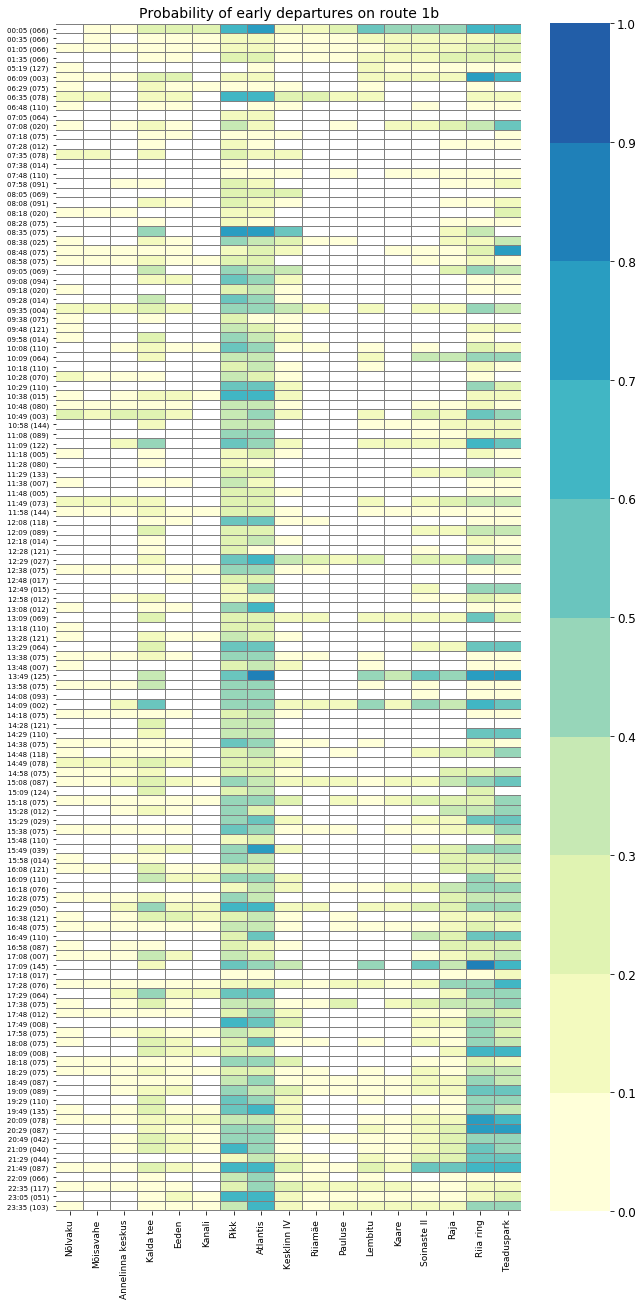

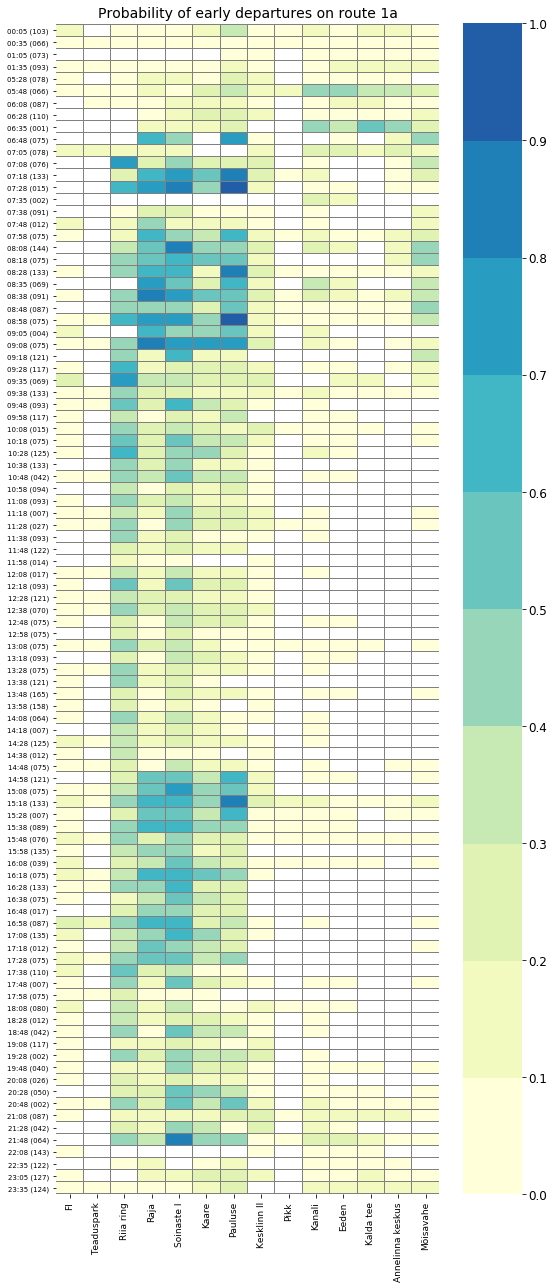

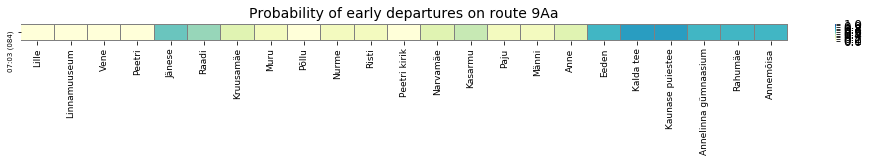

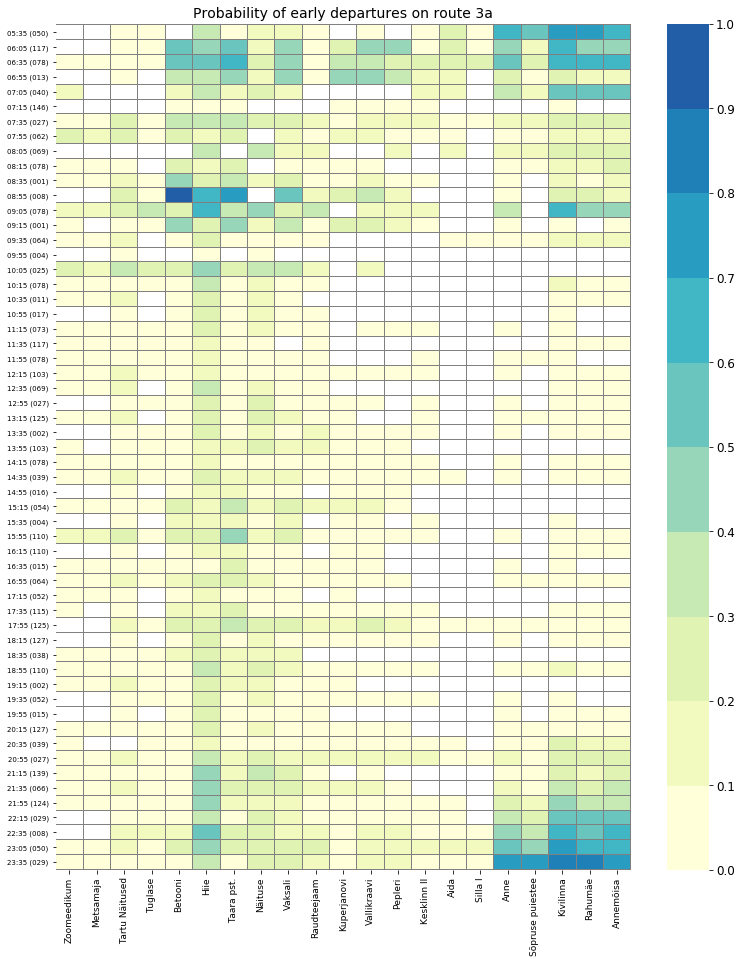

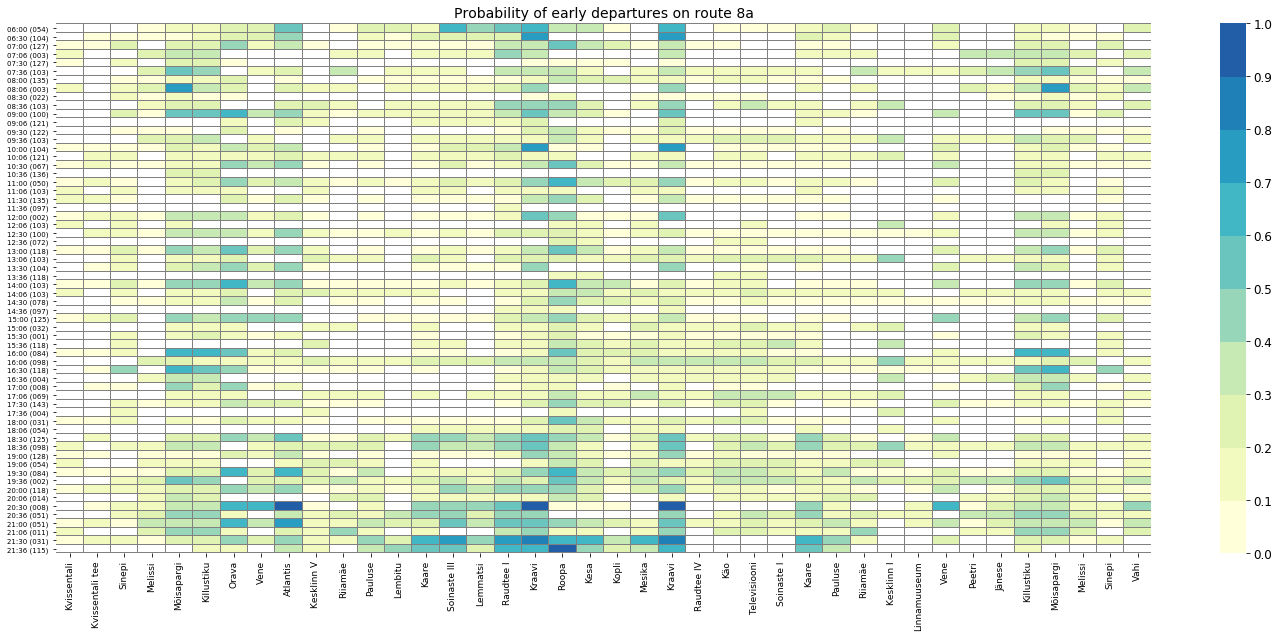

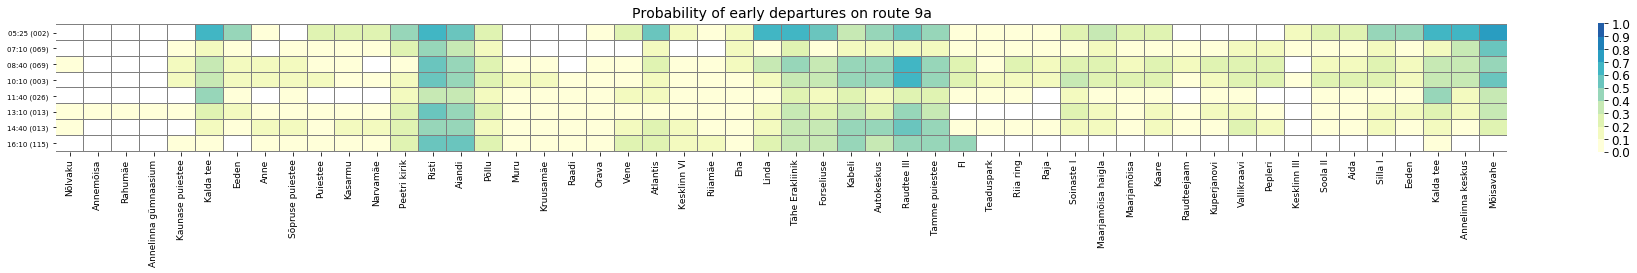

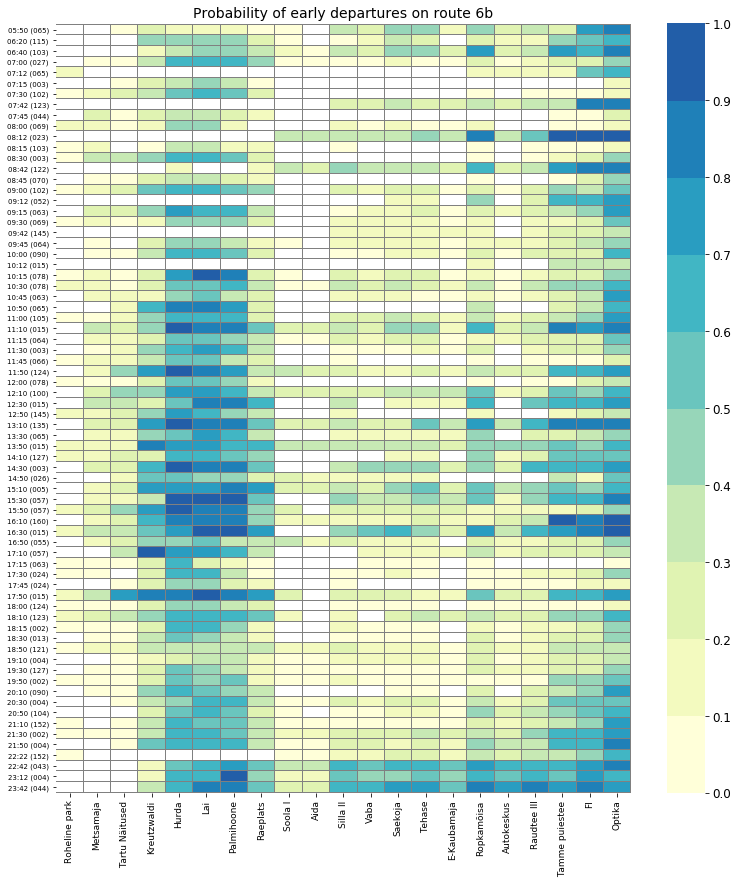

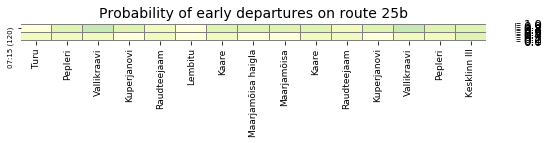

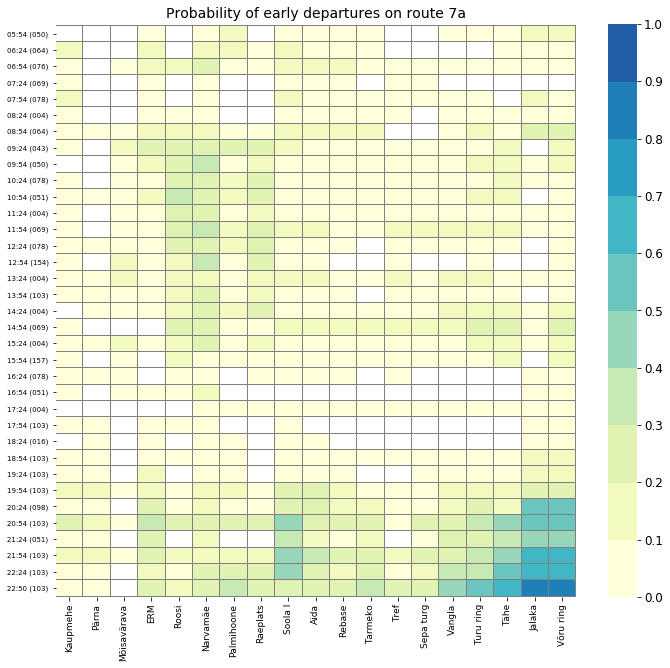

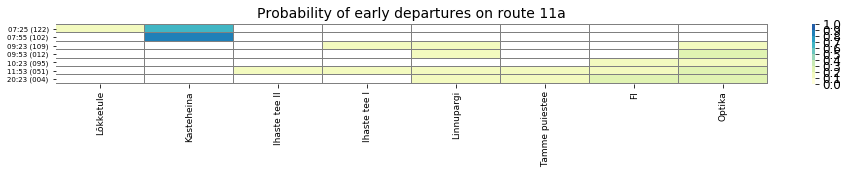

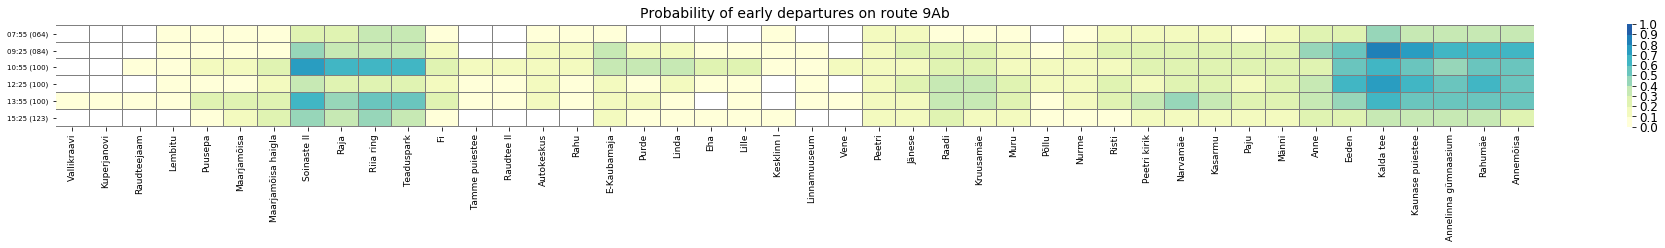

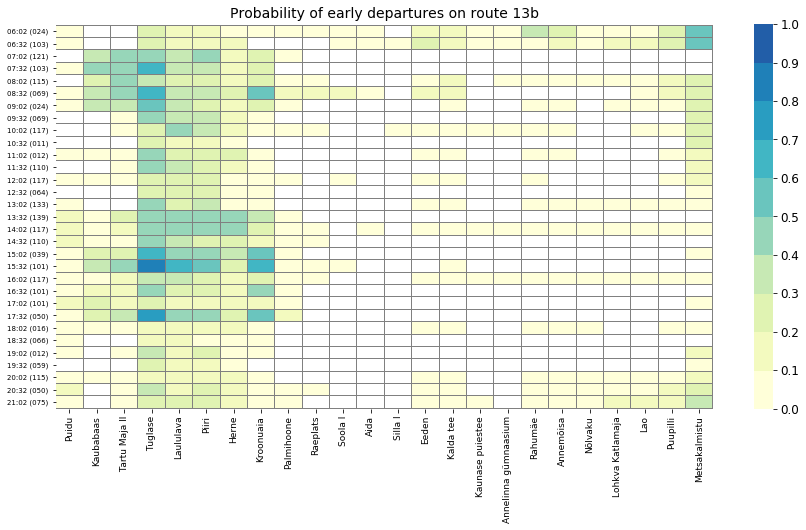

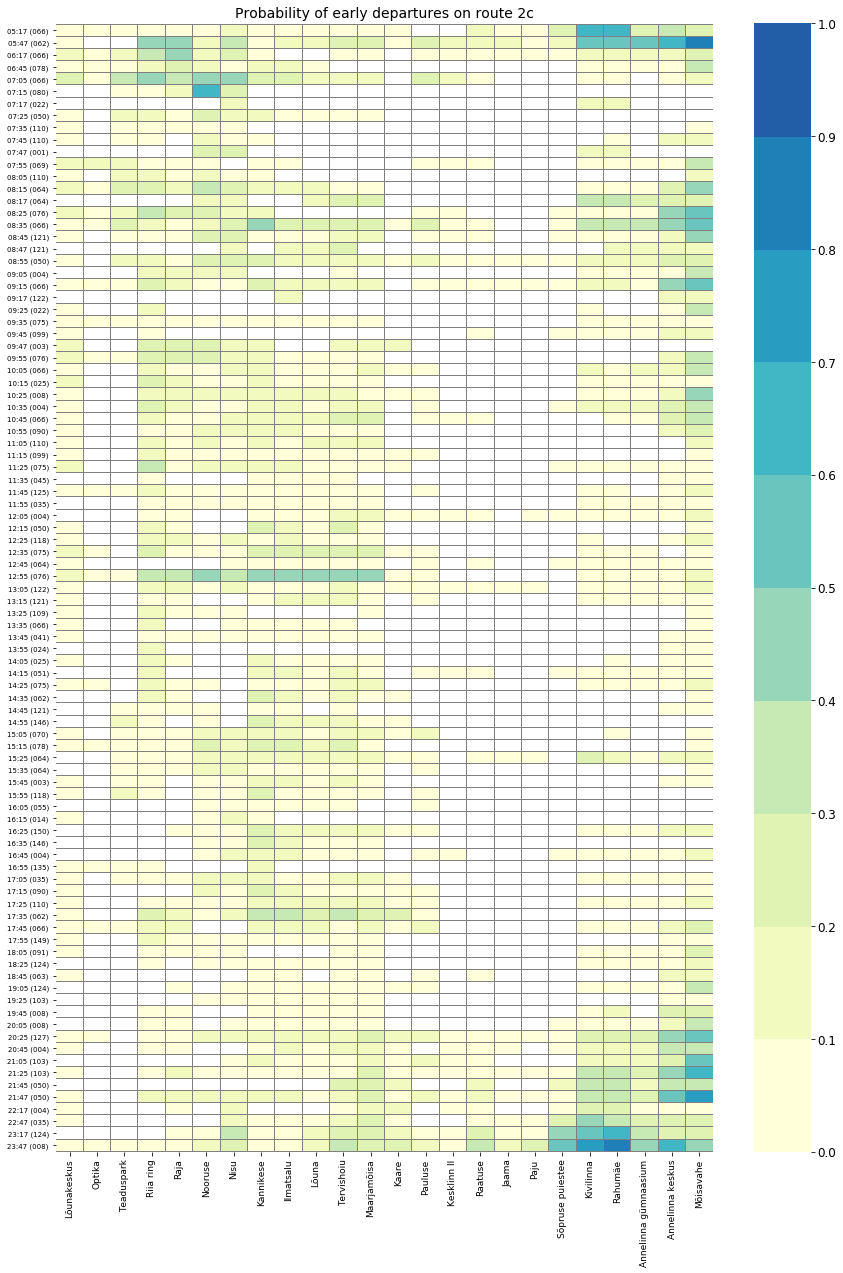

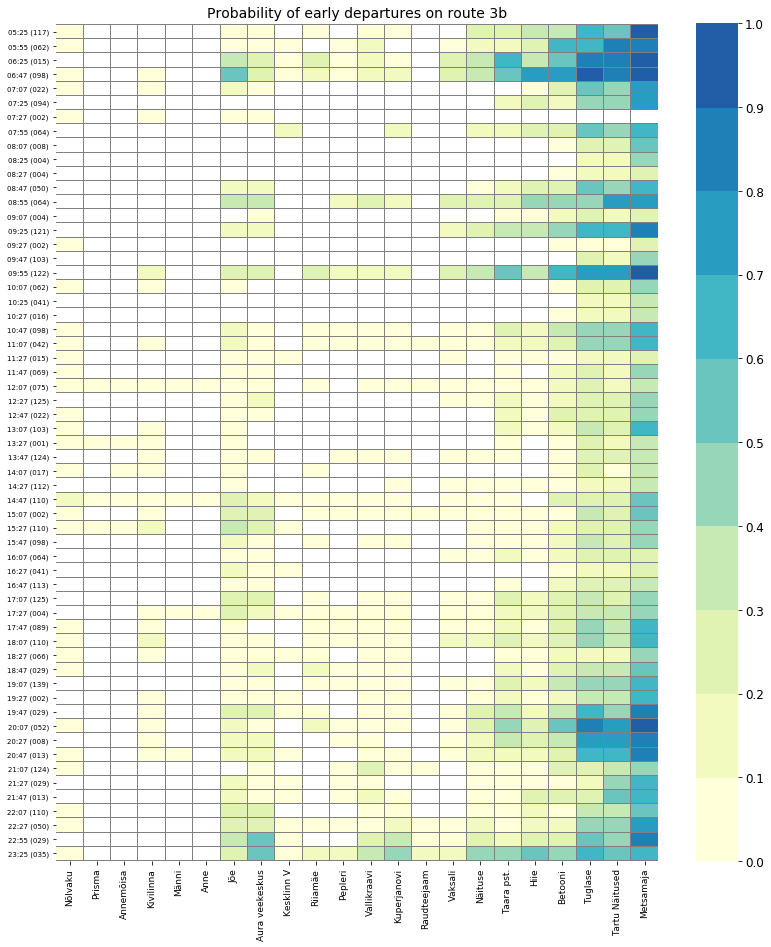

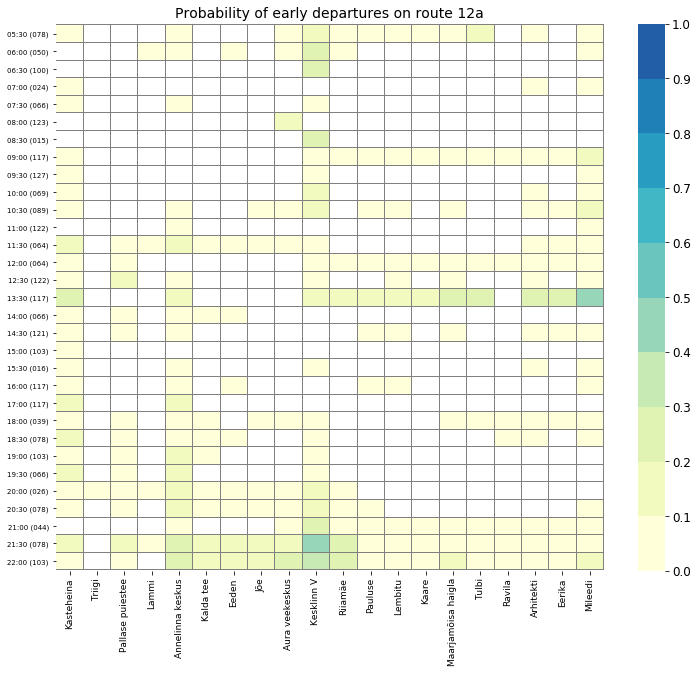

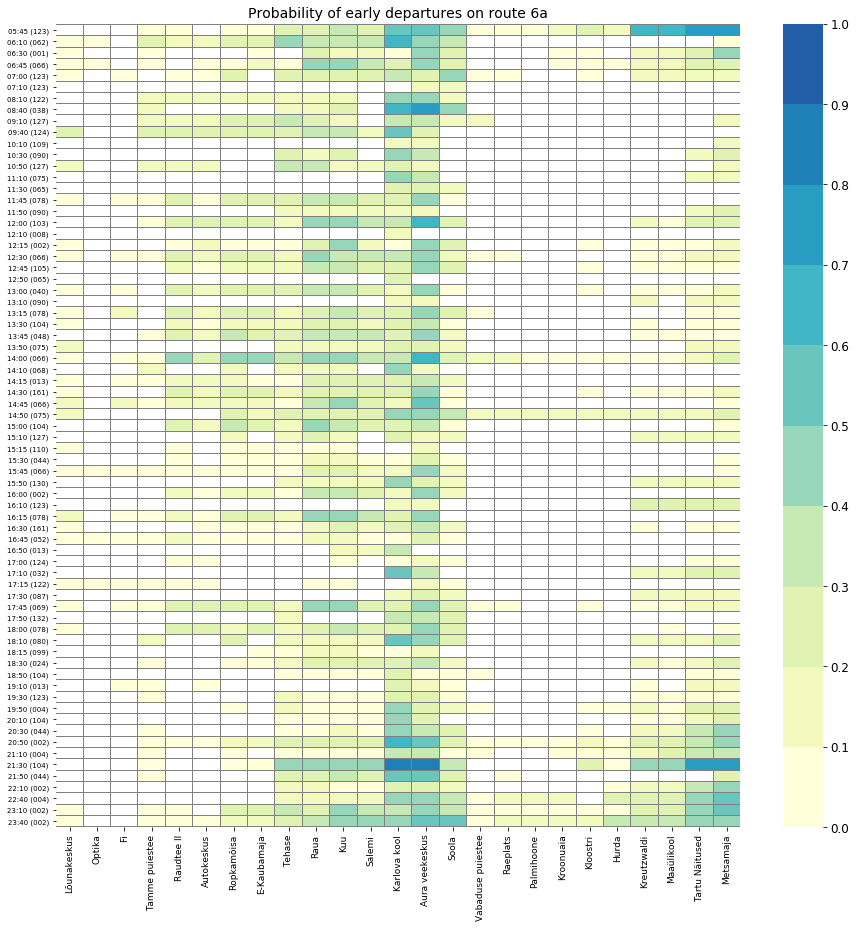

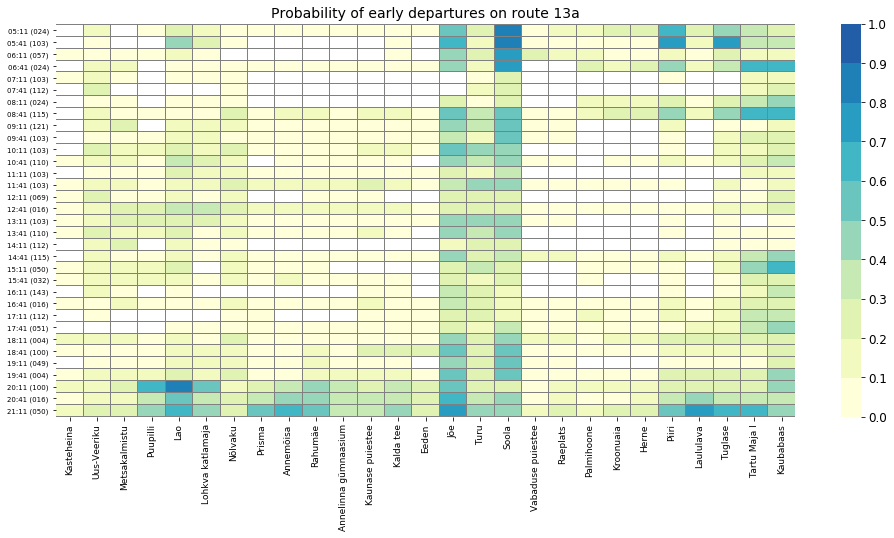

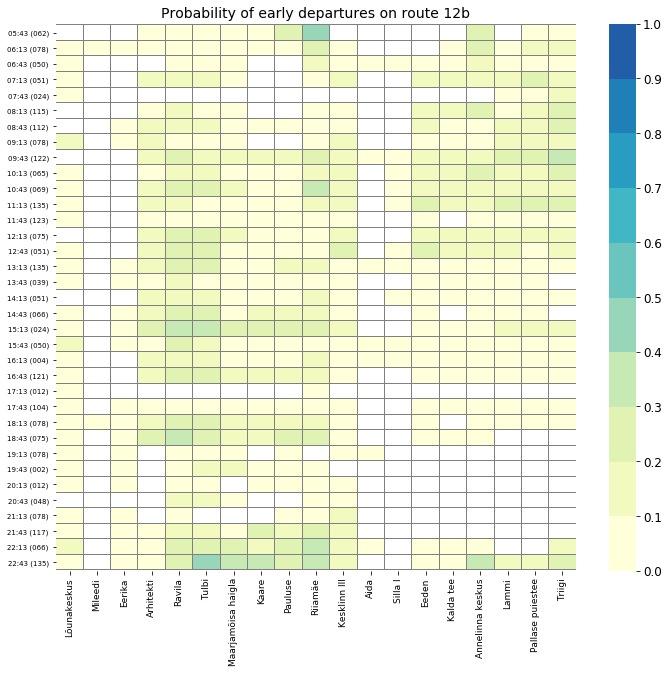

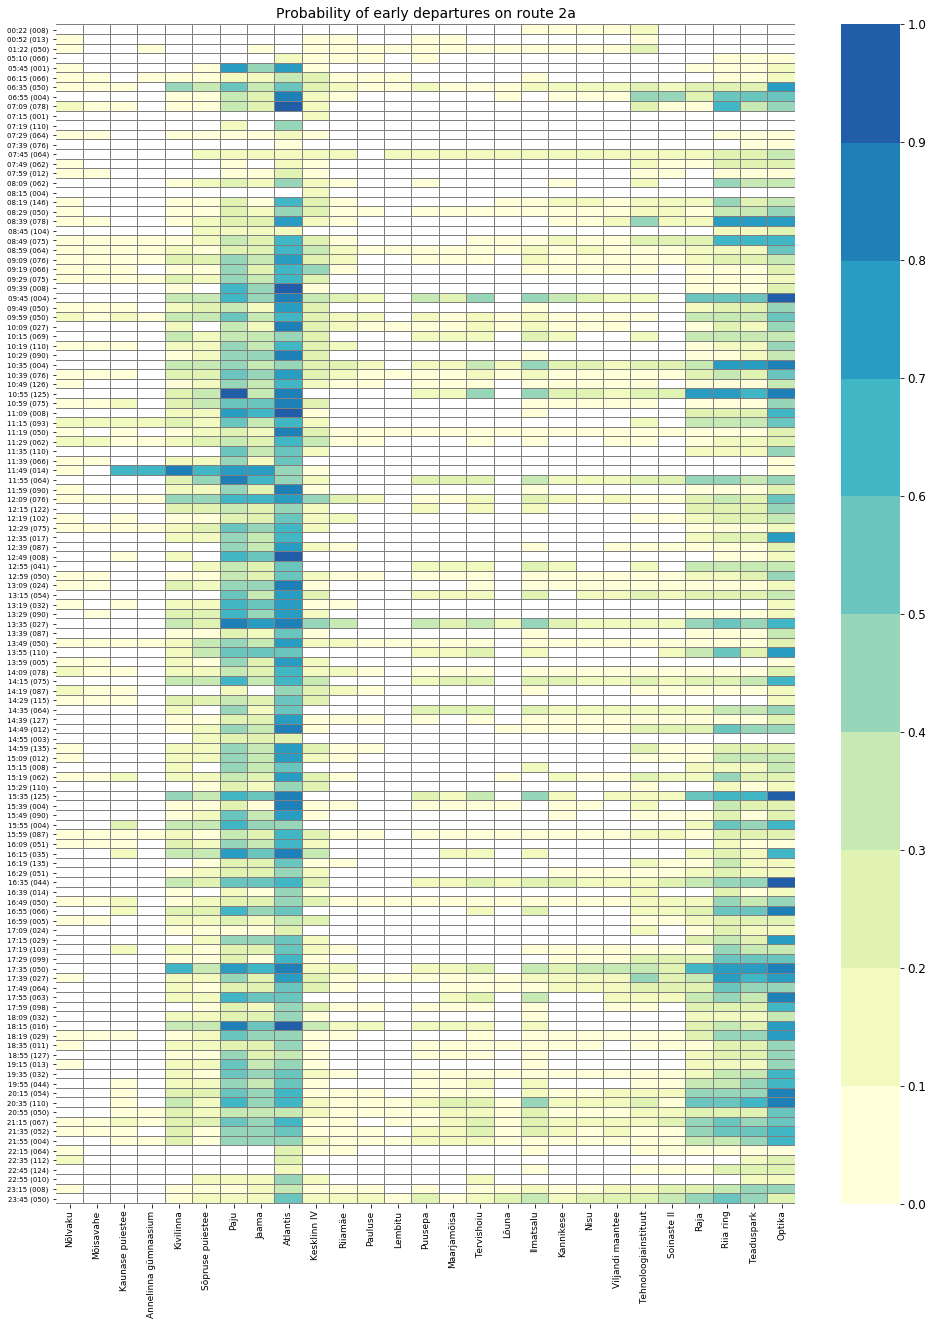

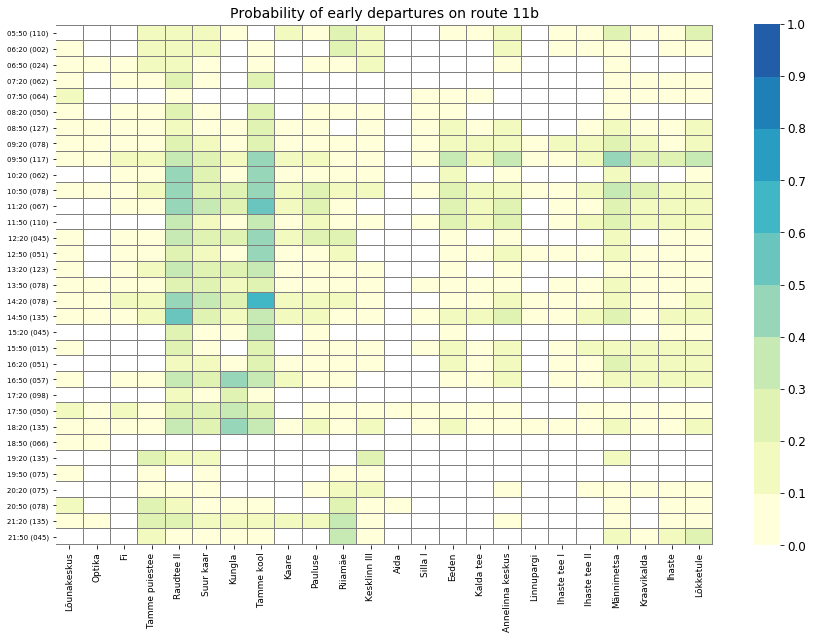

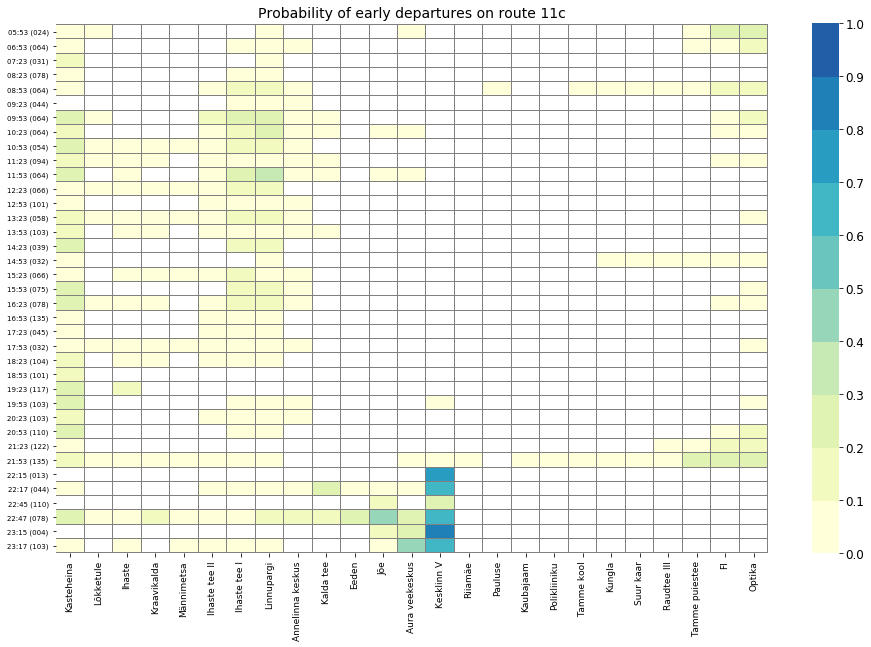

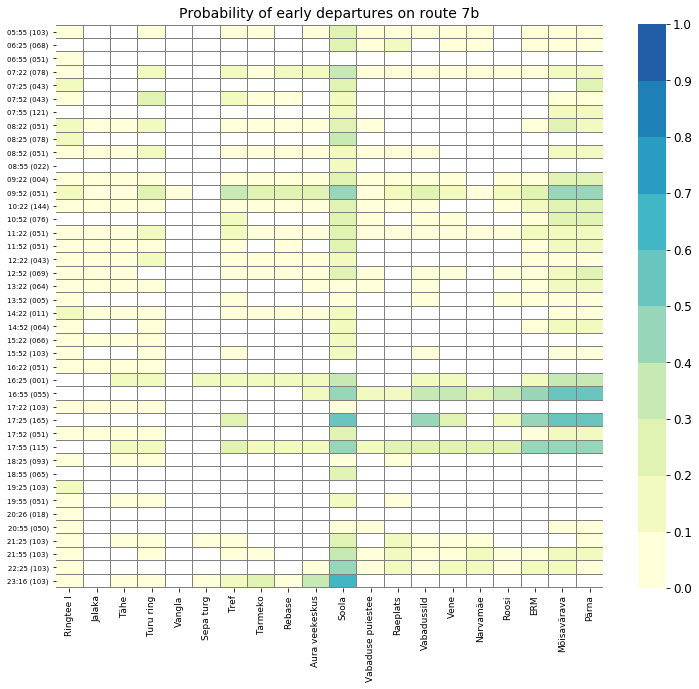

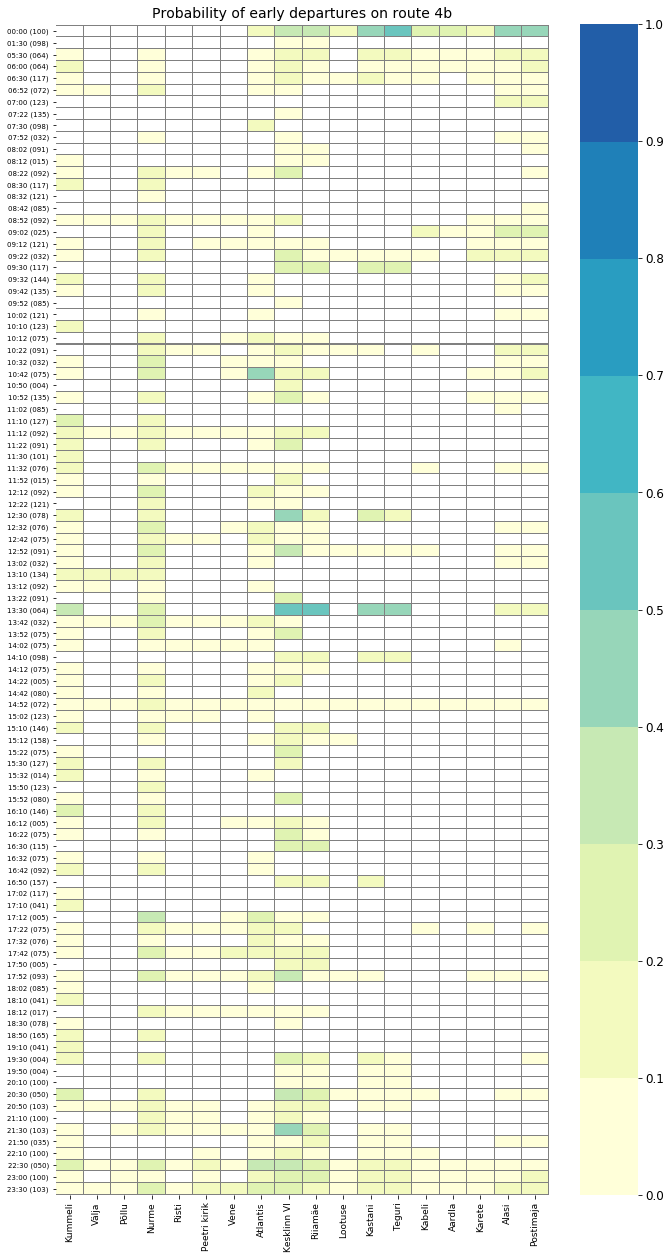

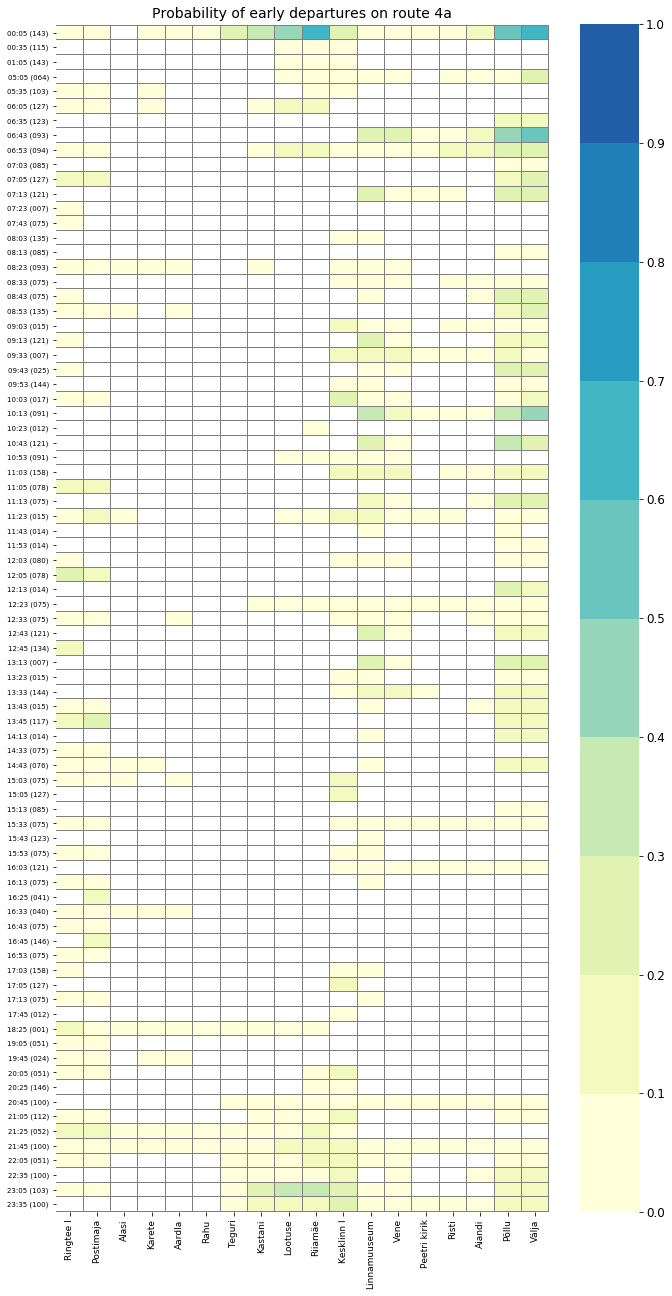

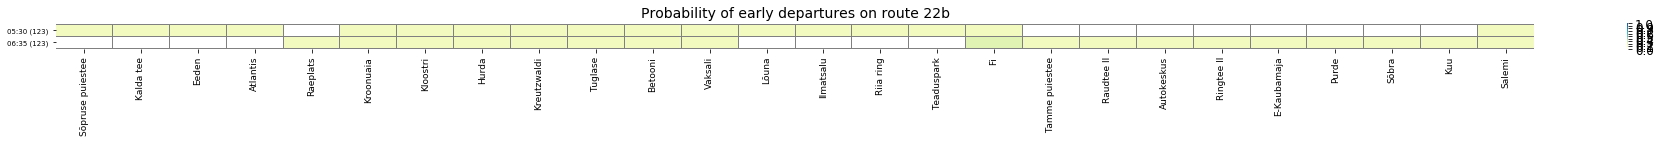

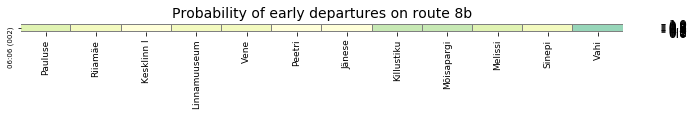

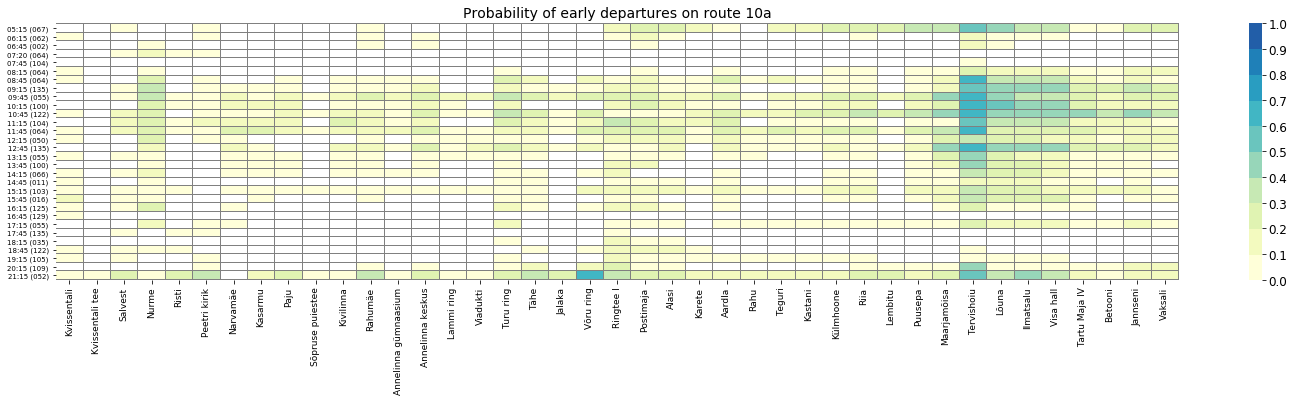

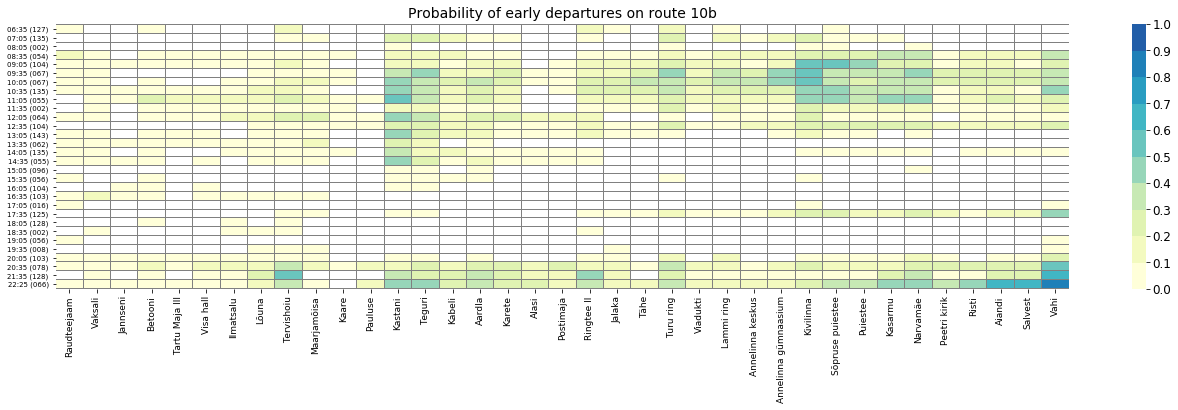

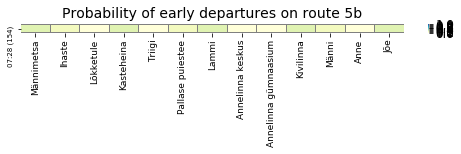

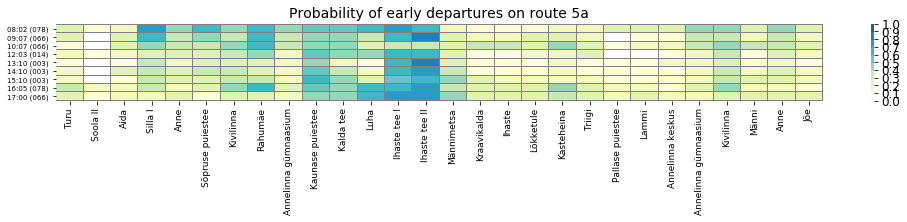

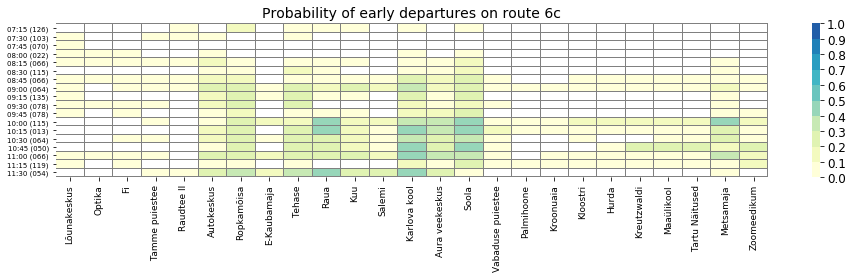

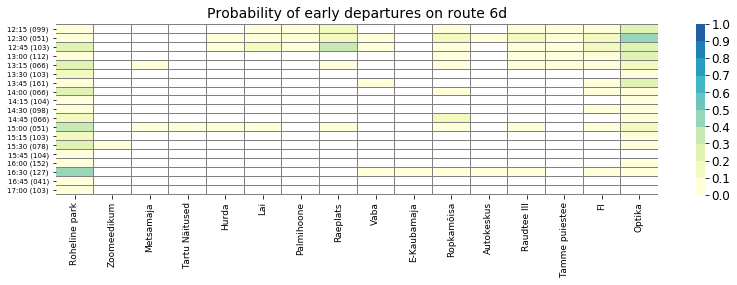

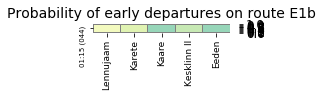

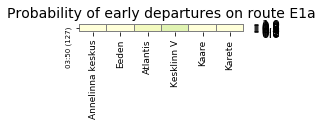

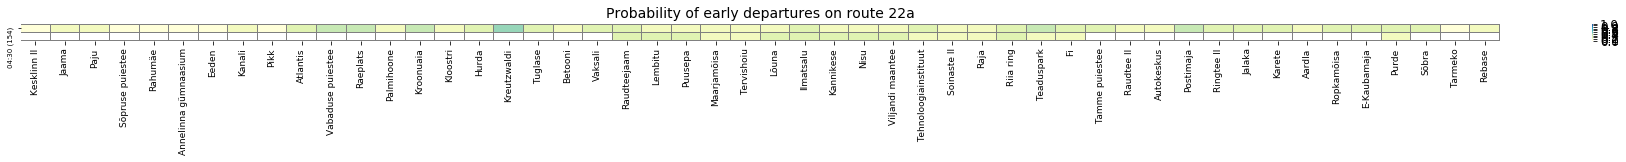

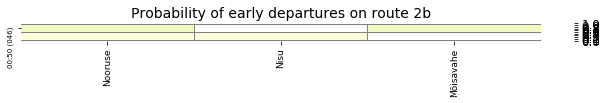

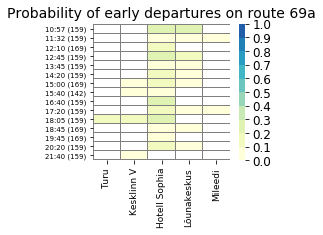

In [6]:
print("x-axis has stop names")
print("y-axis has trip departure time and driver ID with most deviations")

for direction in data.route_direction_id.unique():
    make_graph(direction, True)